# Clique Analysis
Conducting a clique analysis of a network graph involves identifying and analyzing the cliques within the graph. A clique is a subset of nodes in a graph where every node is directly connected to every other node within the subset. 

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import os

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("../data/final_token_selection.csv")


In [2]:
import sys
sys.path.append('..') 

from src.analysis.clique_analysis import * 
from src.visualisations.clique_analysis_visualisations import * 

## Create dataframes for each metrics

In [3]:
import pickle

# Specify the path to the file containing the saved cliques data
clique_data_path = '../output/cliques/metrics/cliques_data_5e-06.pkl'
clique_data = CliquesData(clique_data_path)

# Use the metric_names attribute from CliquesData
metric_names = clique_data.metric_names

# Initialize an empty dictionary to store DataFrames for each metric
metric_dataframes = {
        'weak_estimate': {'sample': {},'sample_population': {},'pvalues': {}, 'sample_directional':{}, 'sample_population_directional':{}, 'pvalues_directional':{}}, # change to adjust nomencalture to we upper to weak 
        'strong_estimate': {'sample': {},'sample_population': {},'pvalues': {}, 'sample_directional':{}, 'sample_population_directional':{}, 'pvalues_directional':{}} # change to adjust nomencalture to we lower to strong 
    }

# Create DataFrames for each metric
for method in ['weak_estimate', 'strong_estimate']:
    for group in ['sample', 'sample_population', 'pvalues', 'sample_directional', 'sample_population_directional','pvalues_directional' ]:
        for metric_name in metric_names:
            metric_dataframes[method][group][metric_name] = clique_data.get_metric_data(method, group, metric_name)

## Figure Generation

### Fig: Size of Clique 

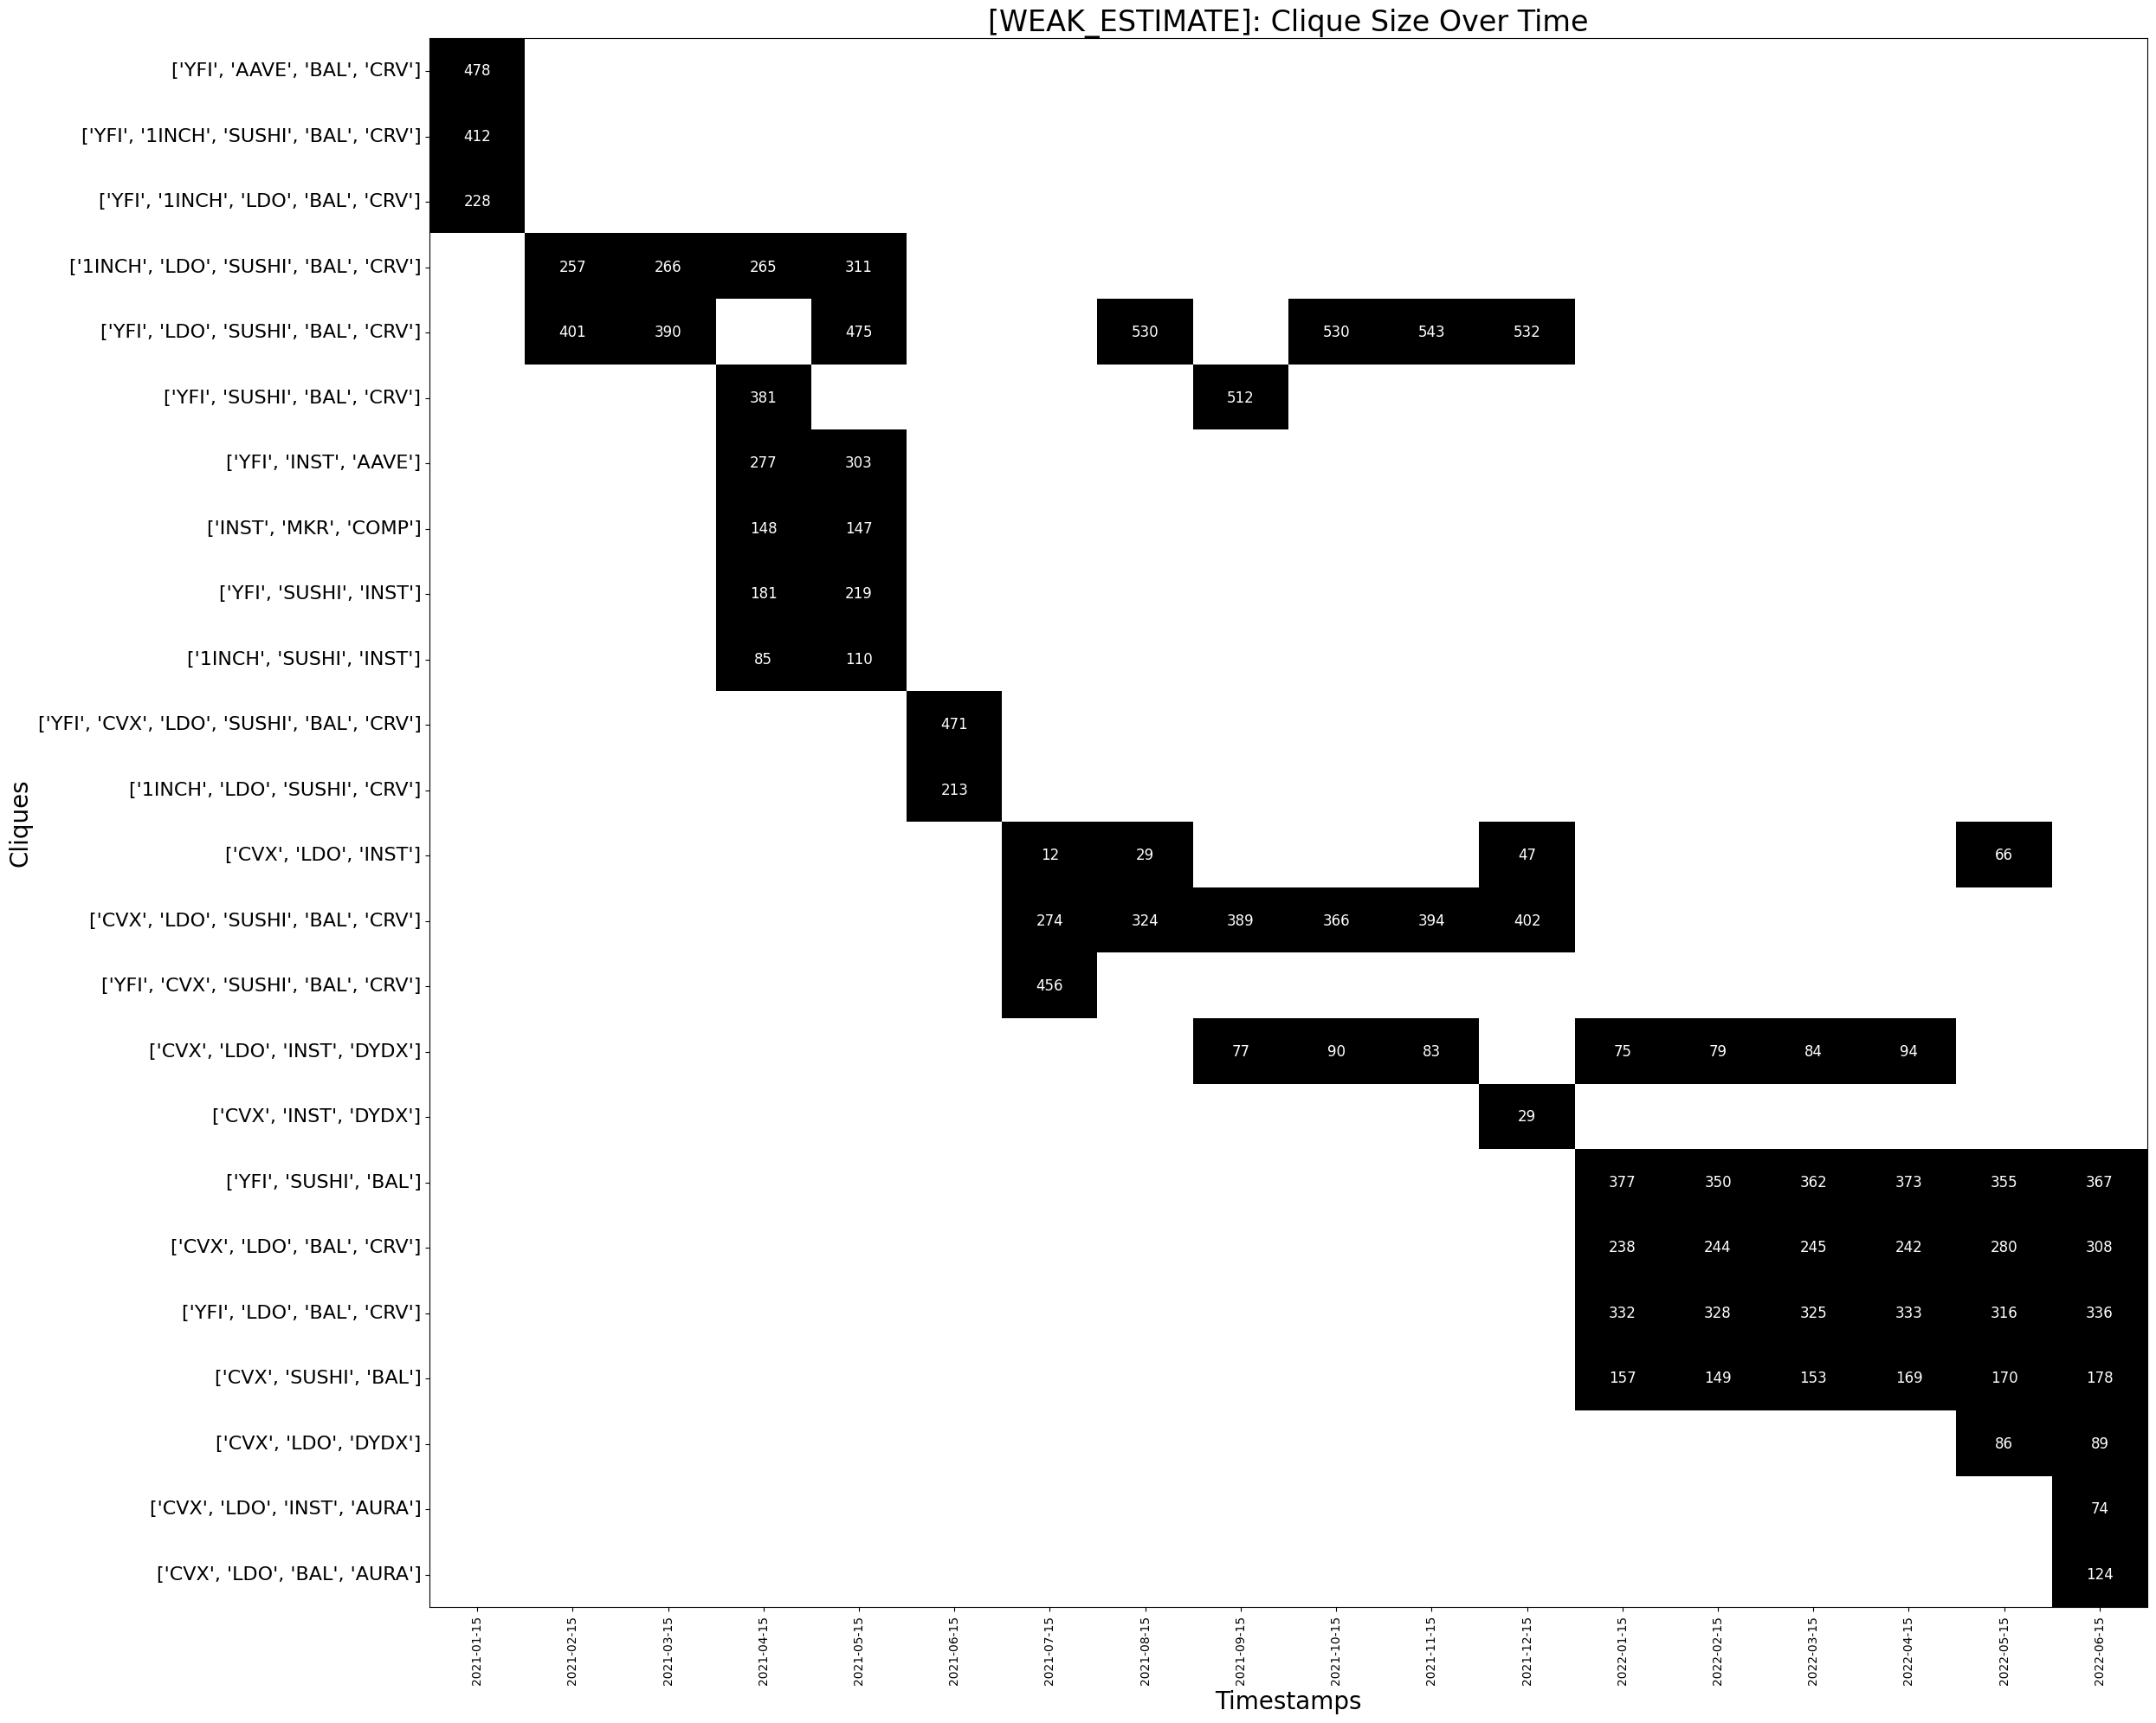

In [4]:
## show weak_estimate
plot_clique_size_over_time(metric_dataframes, method='weak_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

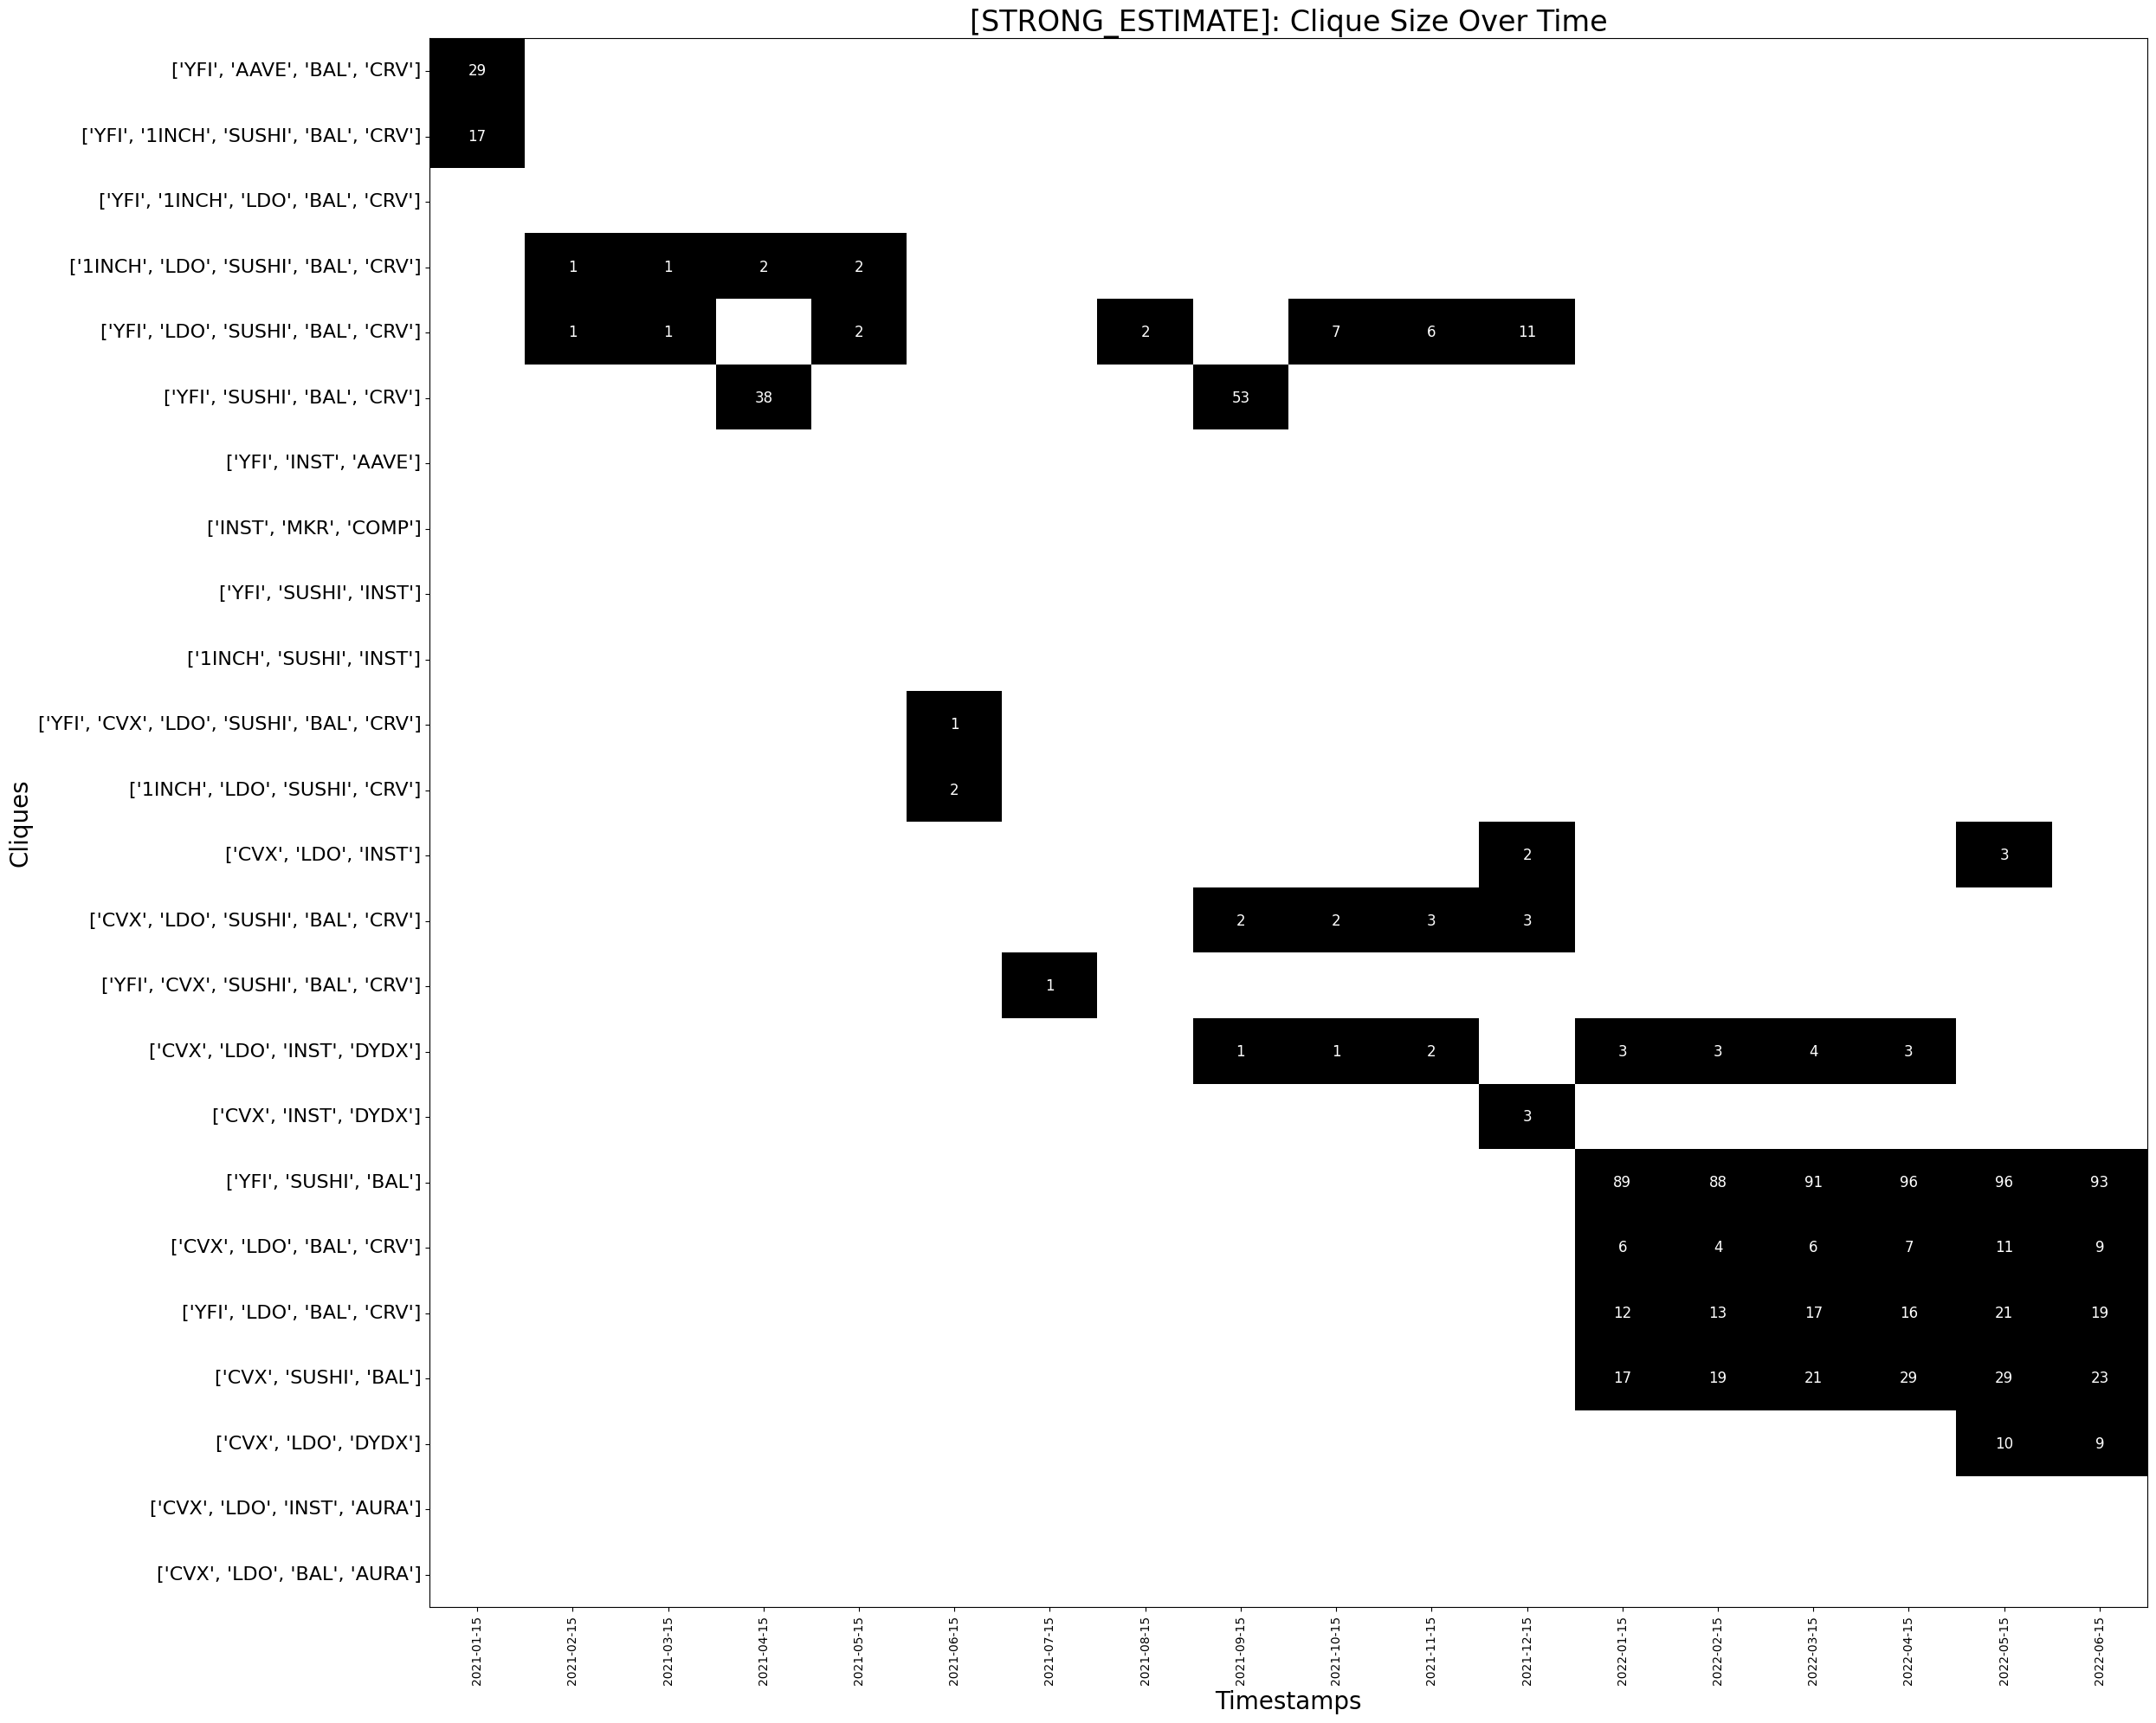

In [5]:
## show lower bound
plot_clique_size_over_time(metric_dataframes, method='strong_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

### Fig: clique growth over time 

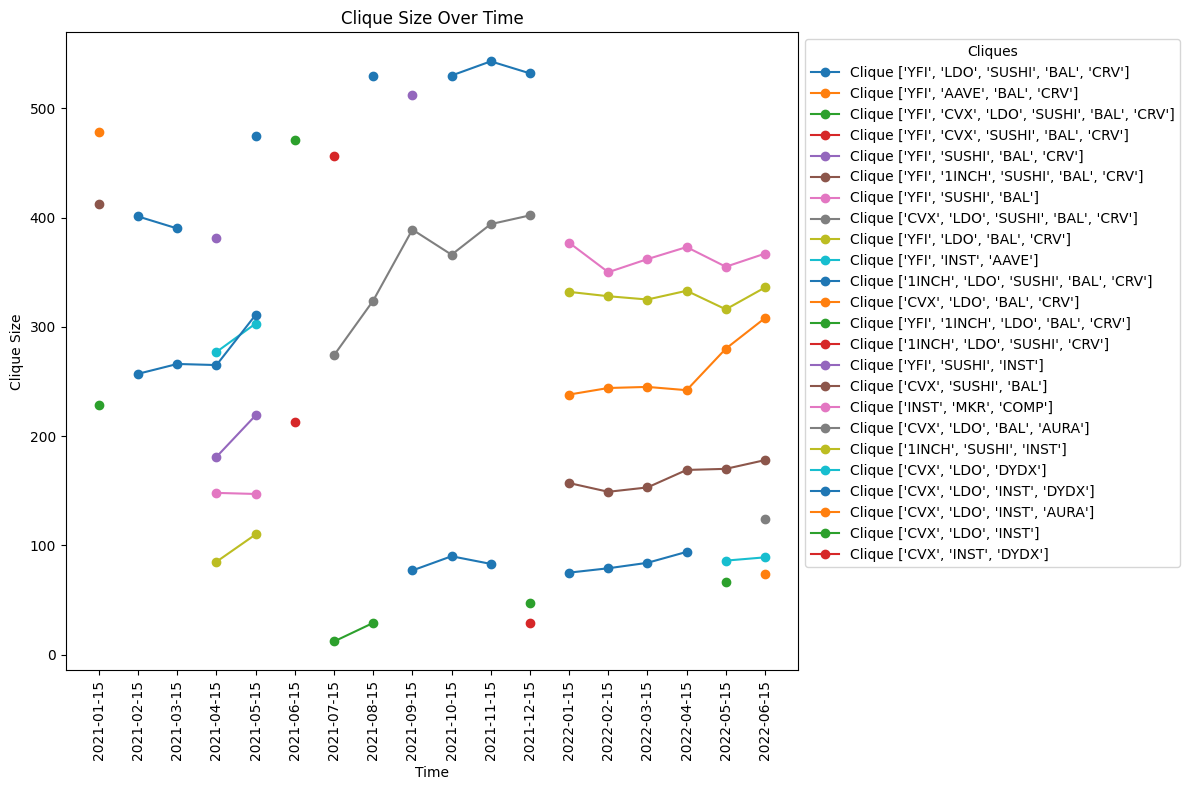

In [6]:
plot_clique_growth_over_time(metric_dataframes, method='weak_estimate', group='sample', output_path="../output/cliques/", save=False, show=True)


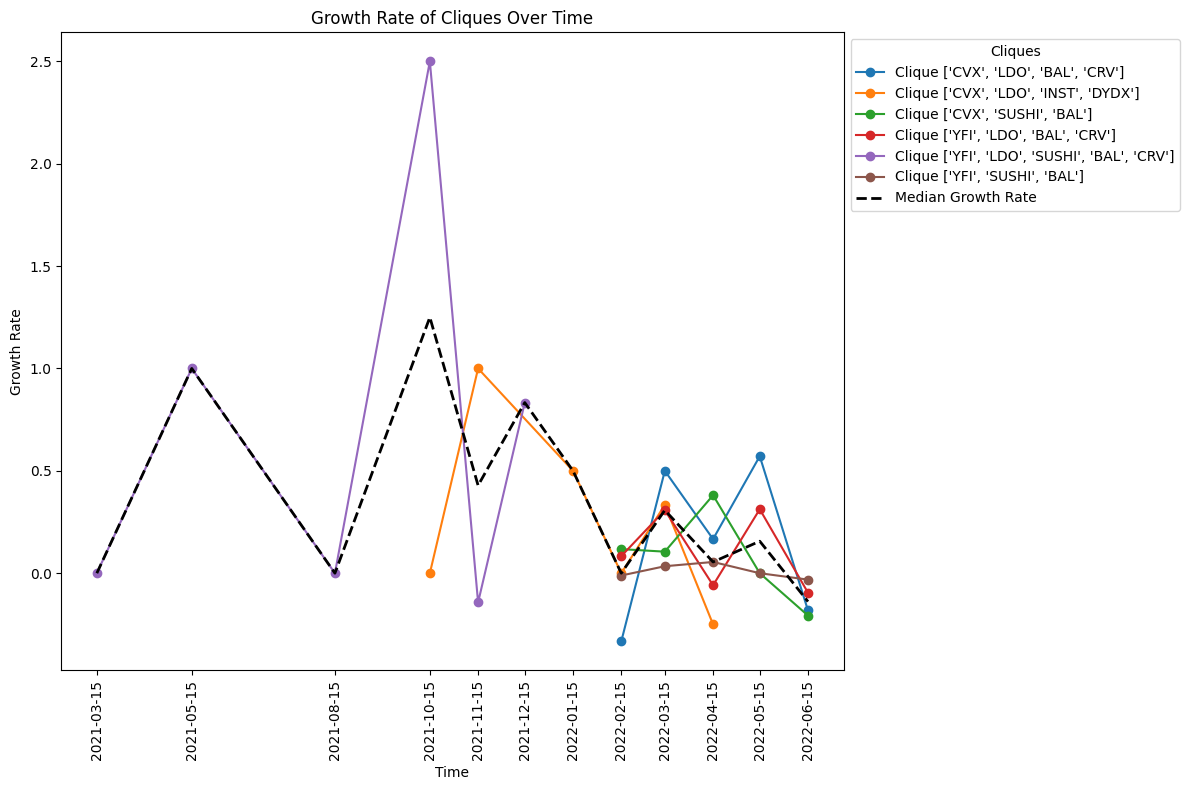

In [7]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_clique_growth_rate_over_time(metric_dataframes, method='strong_estimate', group='sample', output_path="output/cliques/", save=False, show=True)


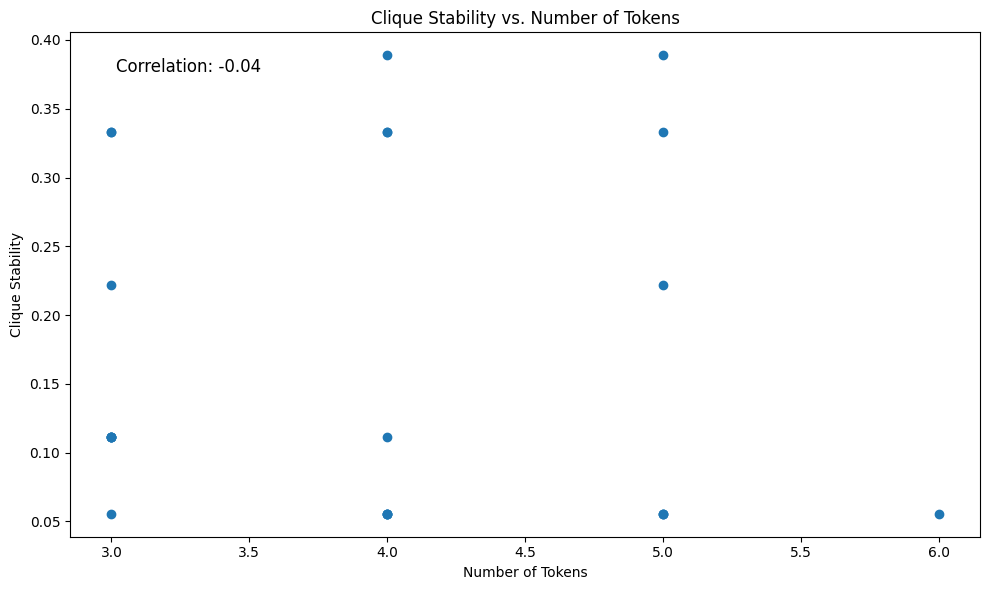

In [8]:
plot_clique_stability_vs_no_of_tokens(metric_dataframes, method='weak_estimate', output_path="output/cliques/", save=False, show=True)

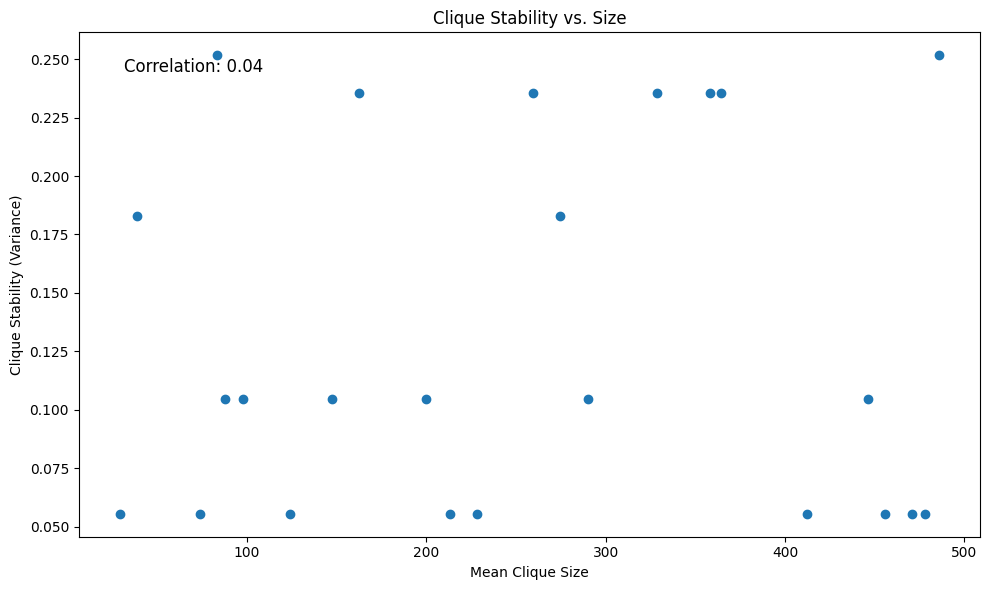

In [9]:
plot_clique_stability_vs_size(metric_dataframes, method='weak_estimate', output_path="output/cliques/", save=False, show=True)

### Fig: total_influence

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


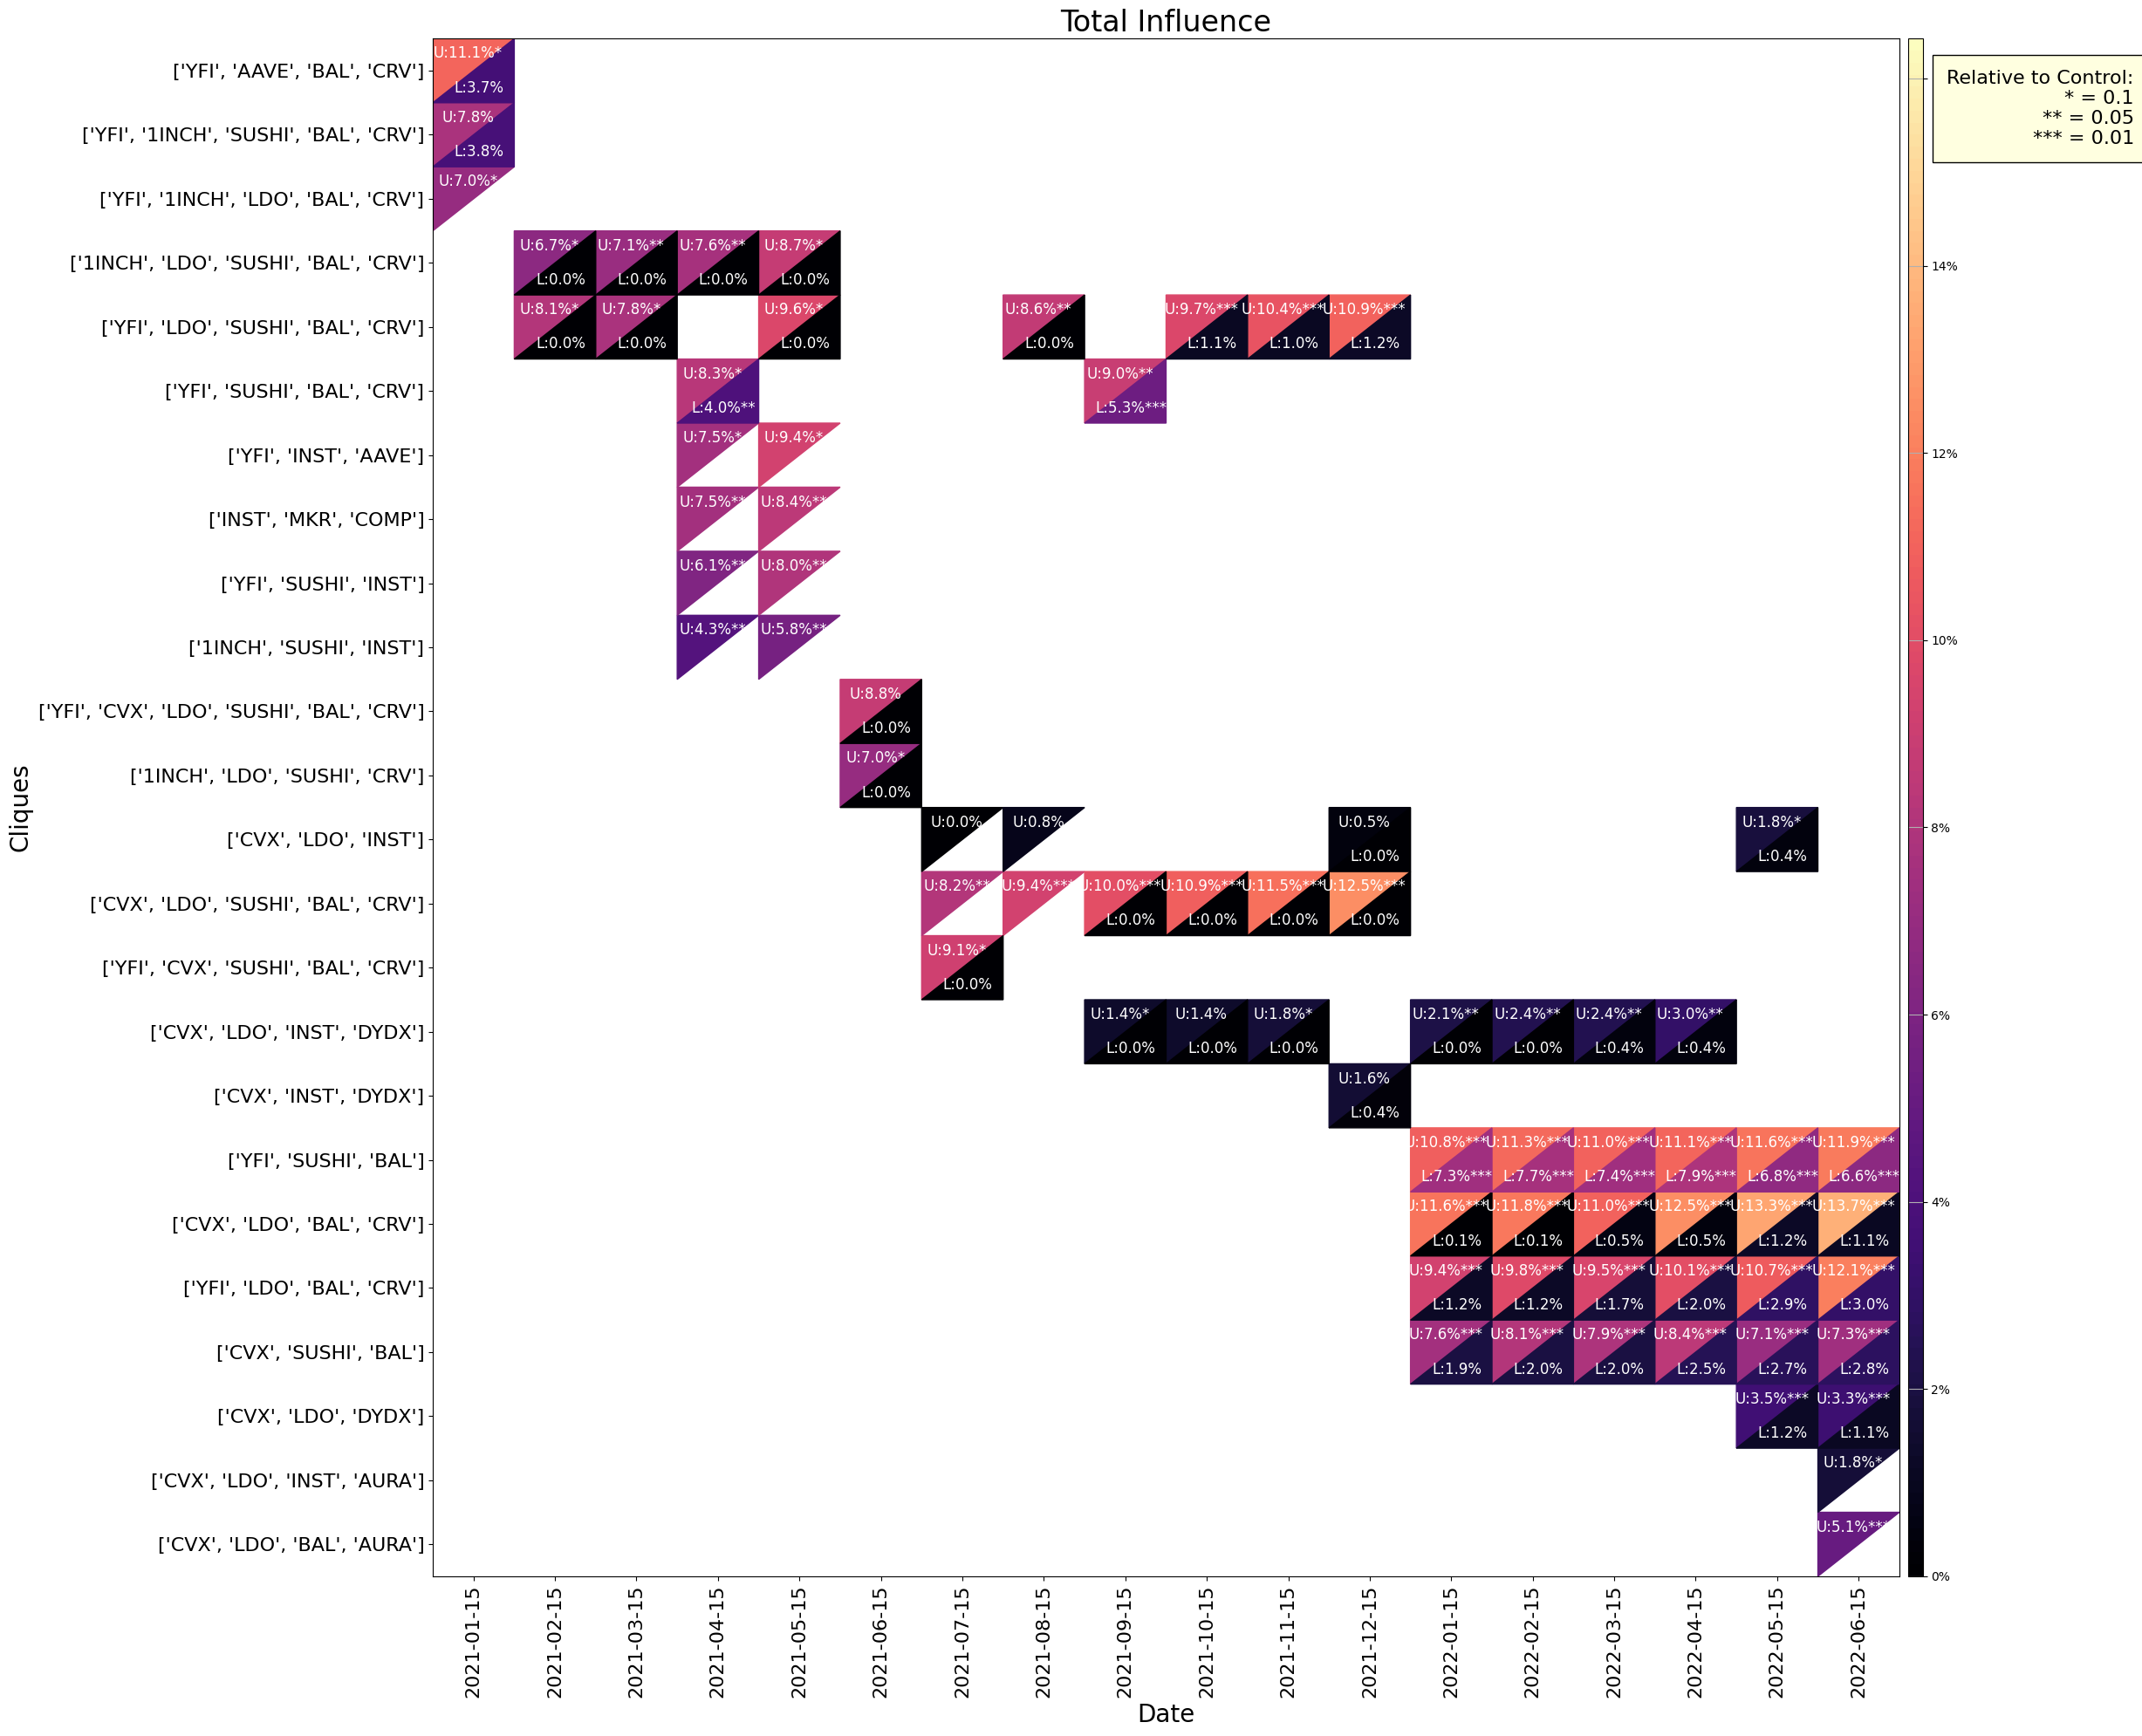

In [10]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='total_influence', pct=True, log=False, output_path="../output/cliques/",  save=True, show=True)

### Fig: gini_total_influence

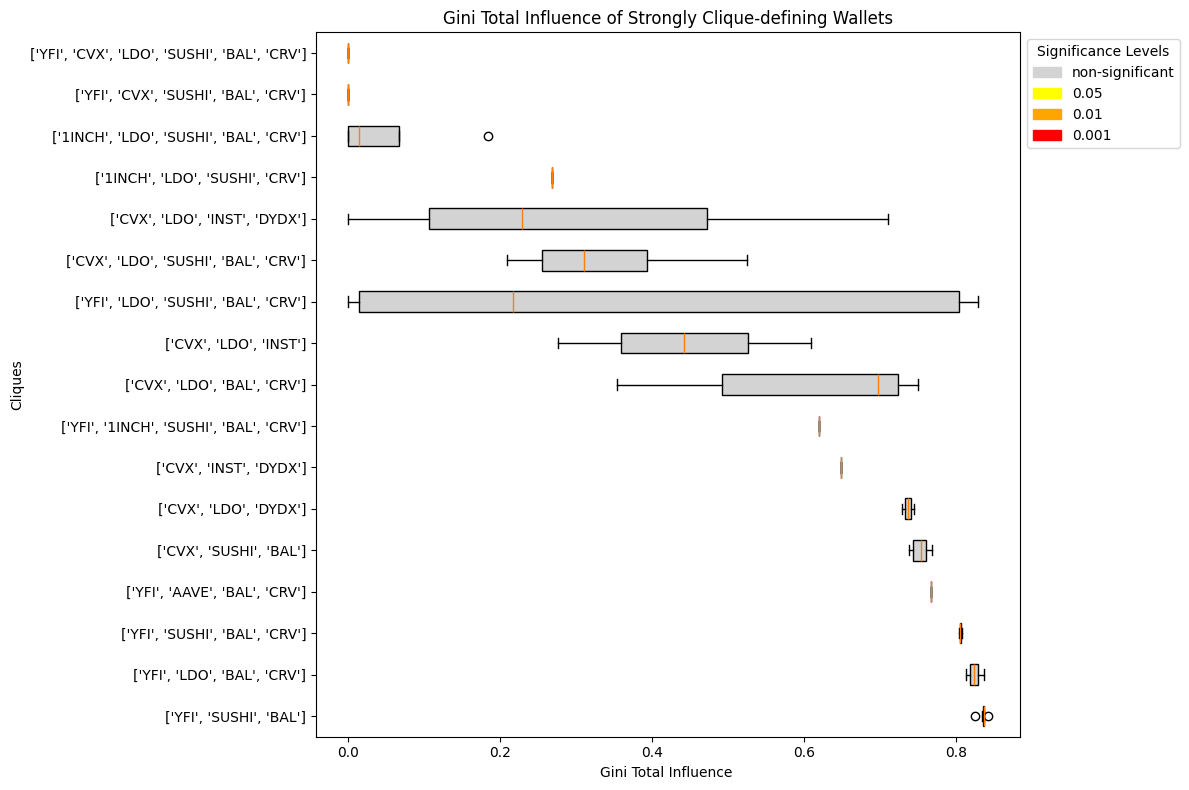

In [11]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='strong_estimate', group='sample', output_path="../output/cliques/", save=False, show=True)

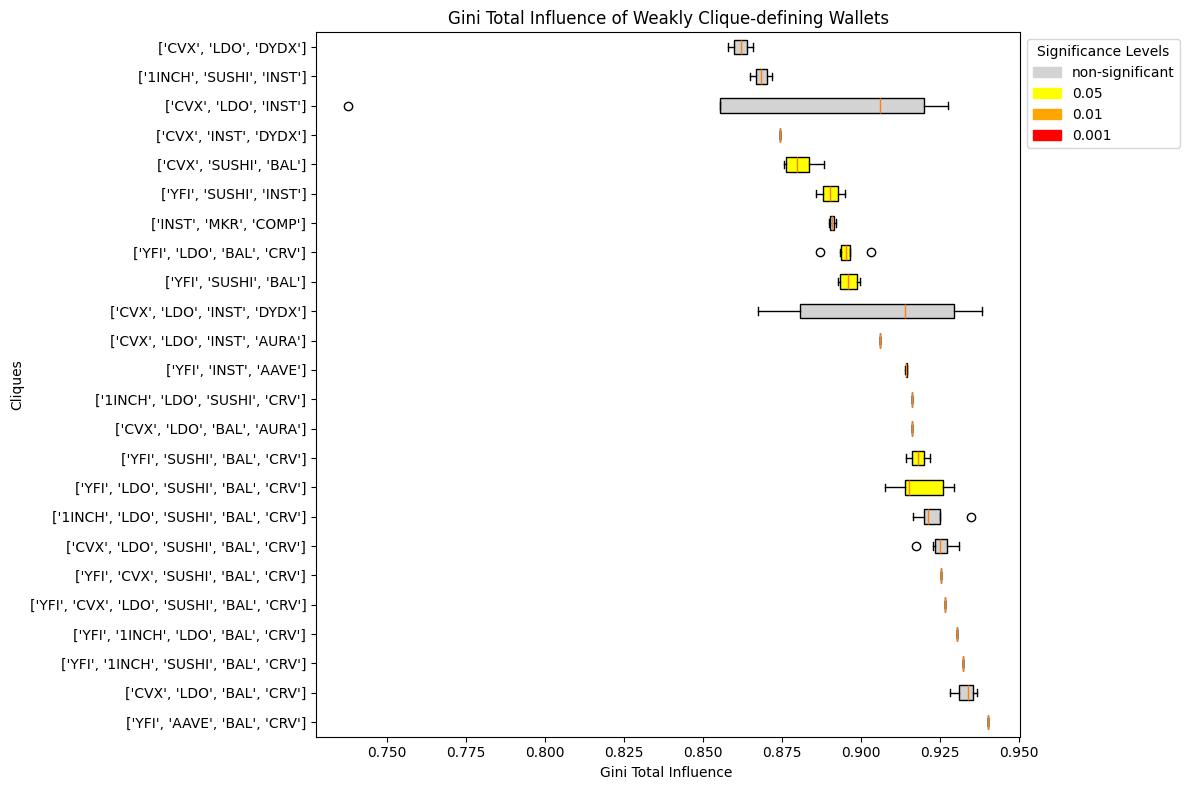

In [12]:
plot_boxplot_with_significance(metric_dataframes, 'gini_total_influence', unit='', method='weak_estimate', group='sample', output_path="../output/cliques/", save=False, show=True)

### Fig: internal_influence 

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


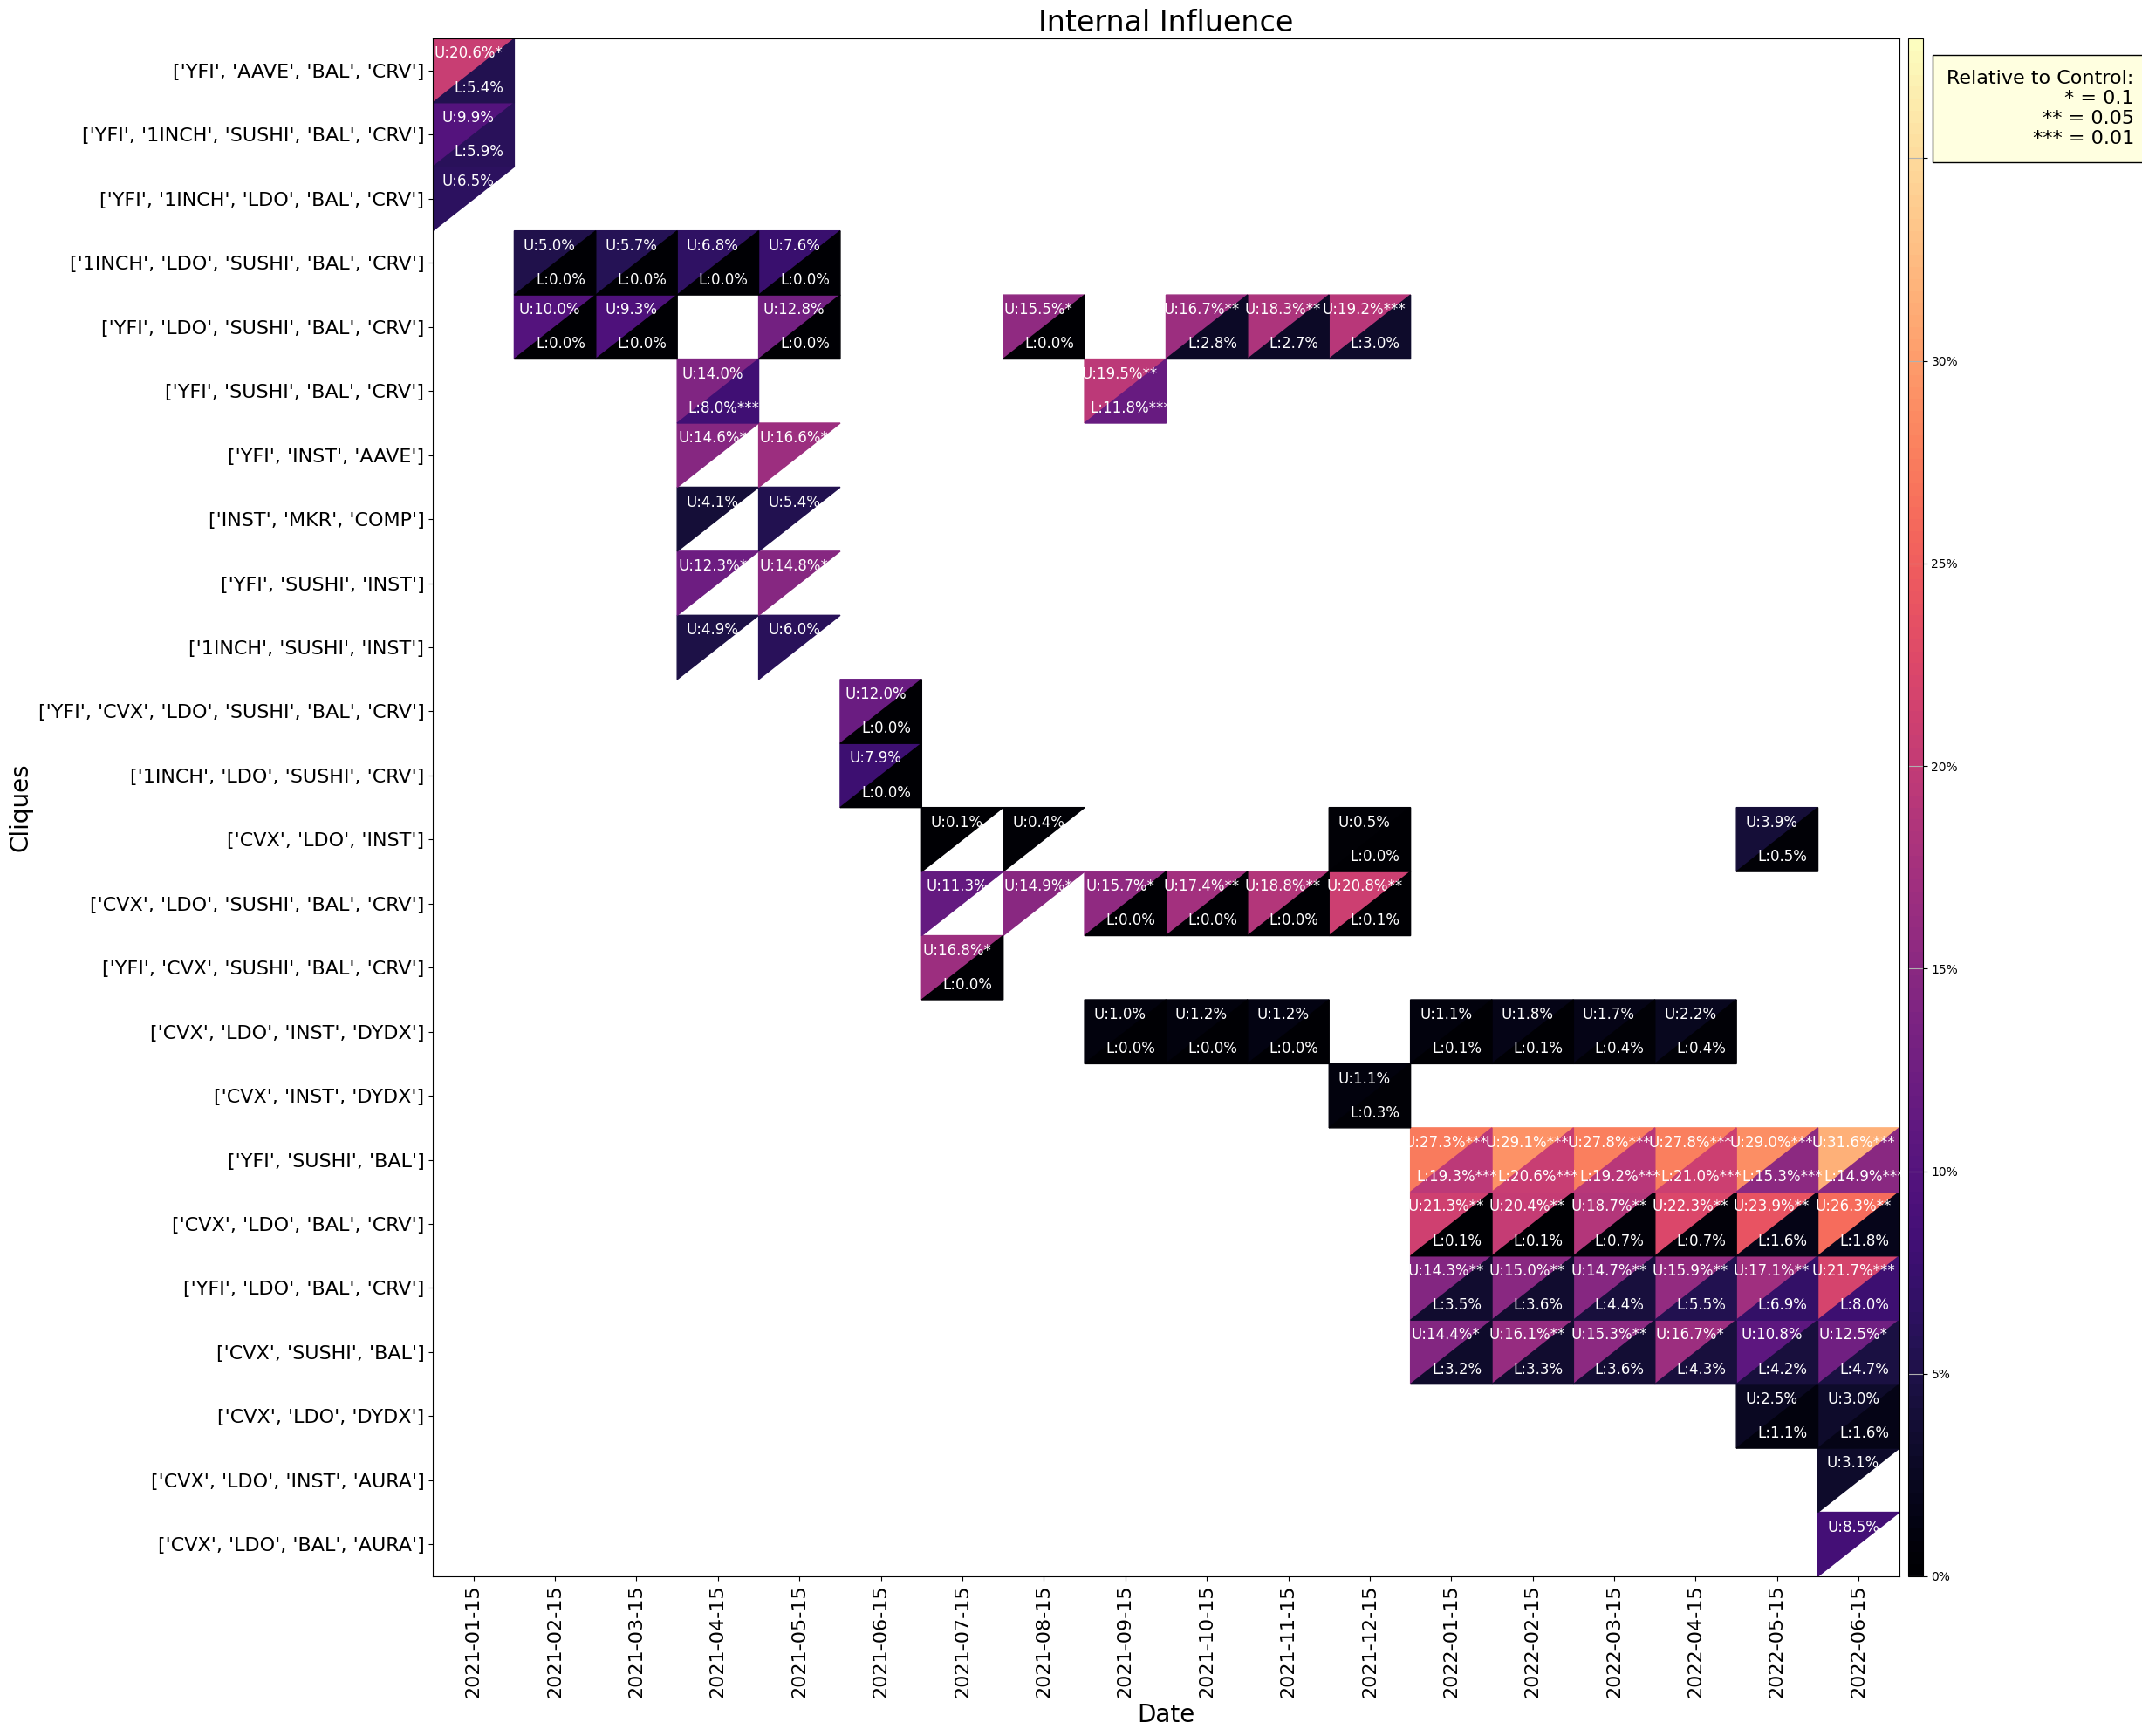

In [13]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='internal_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_internal_influence

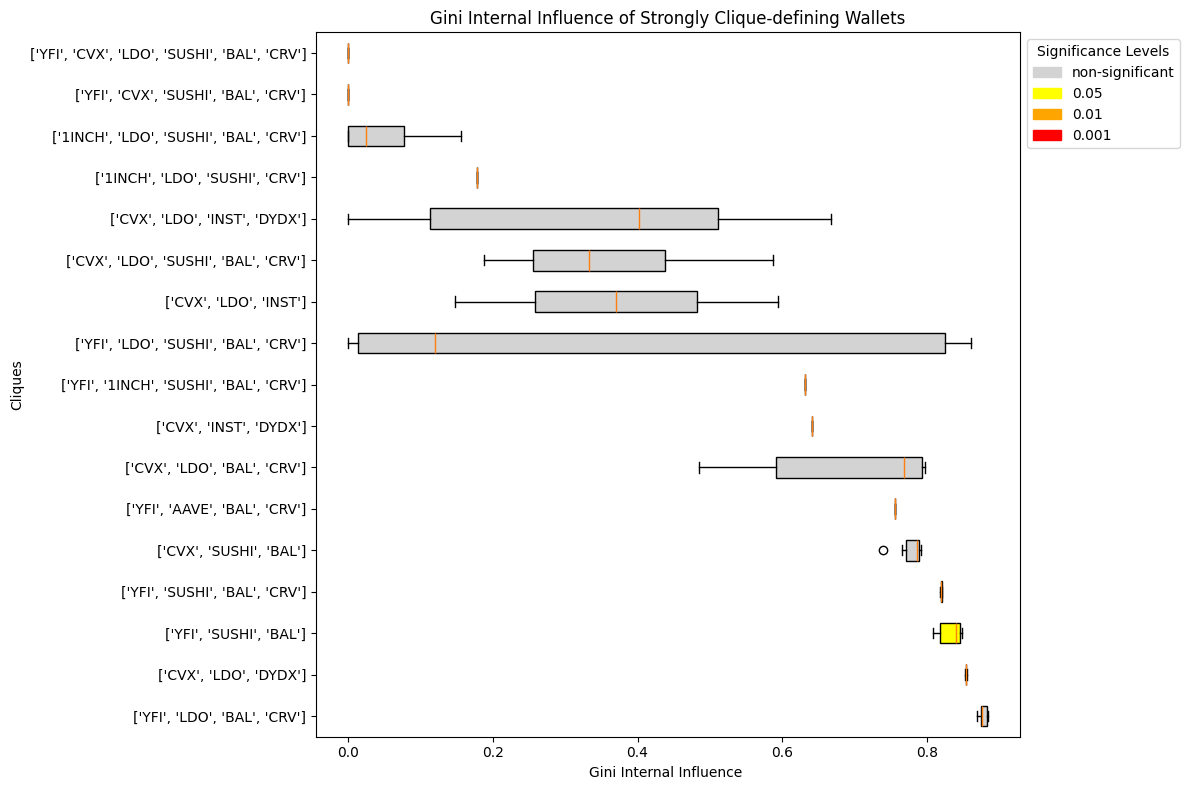

In [14]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='strong_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

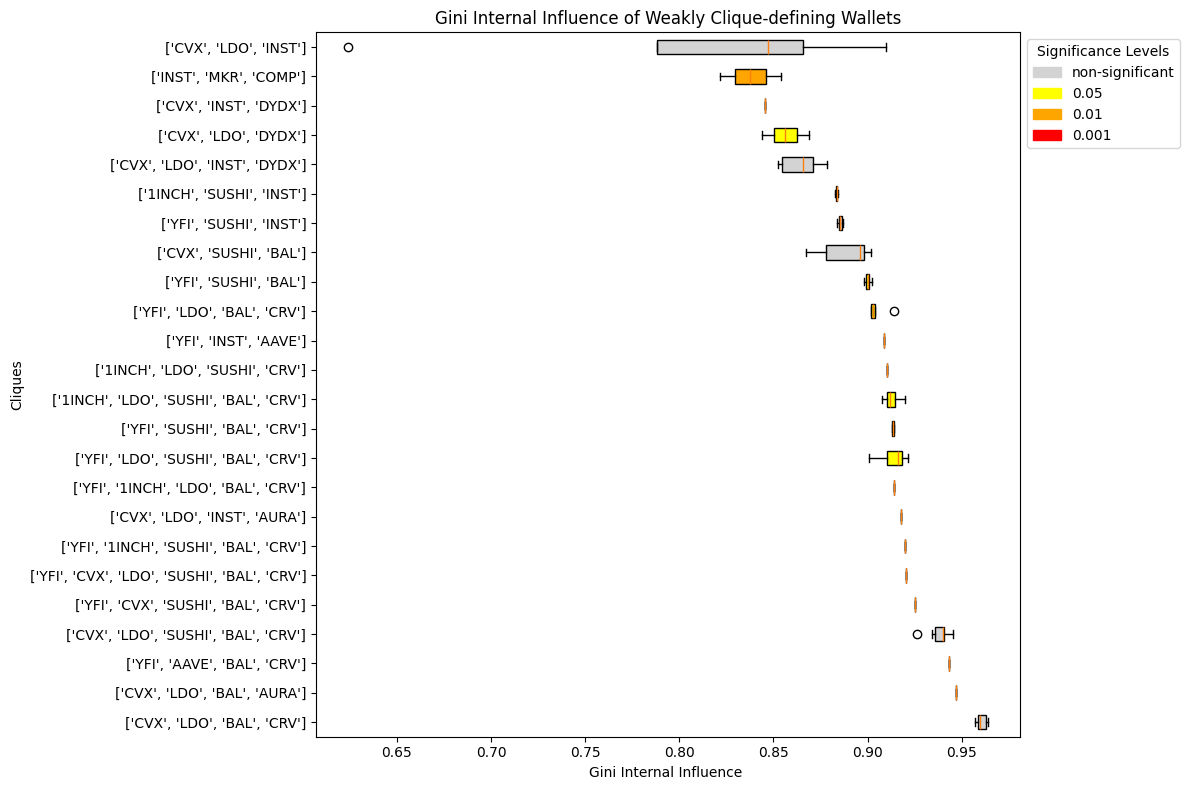

In [15]:
plot_boxplot_with_significance(metric_dataframes, 'gini_internal_influence', unit='', method='weak_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: external_influence

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


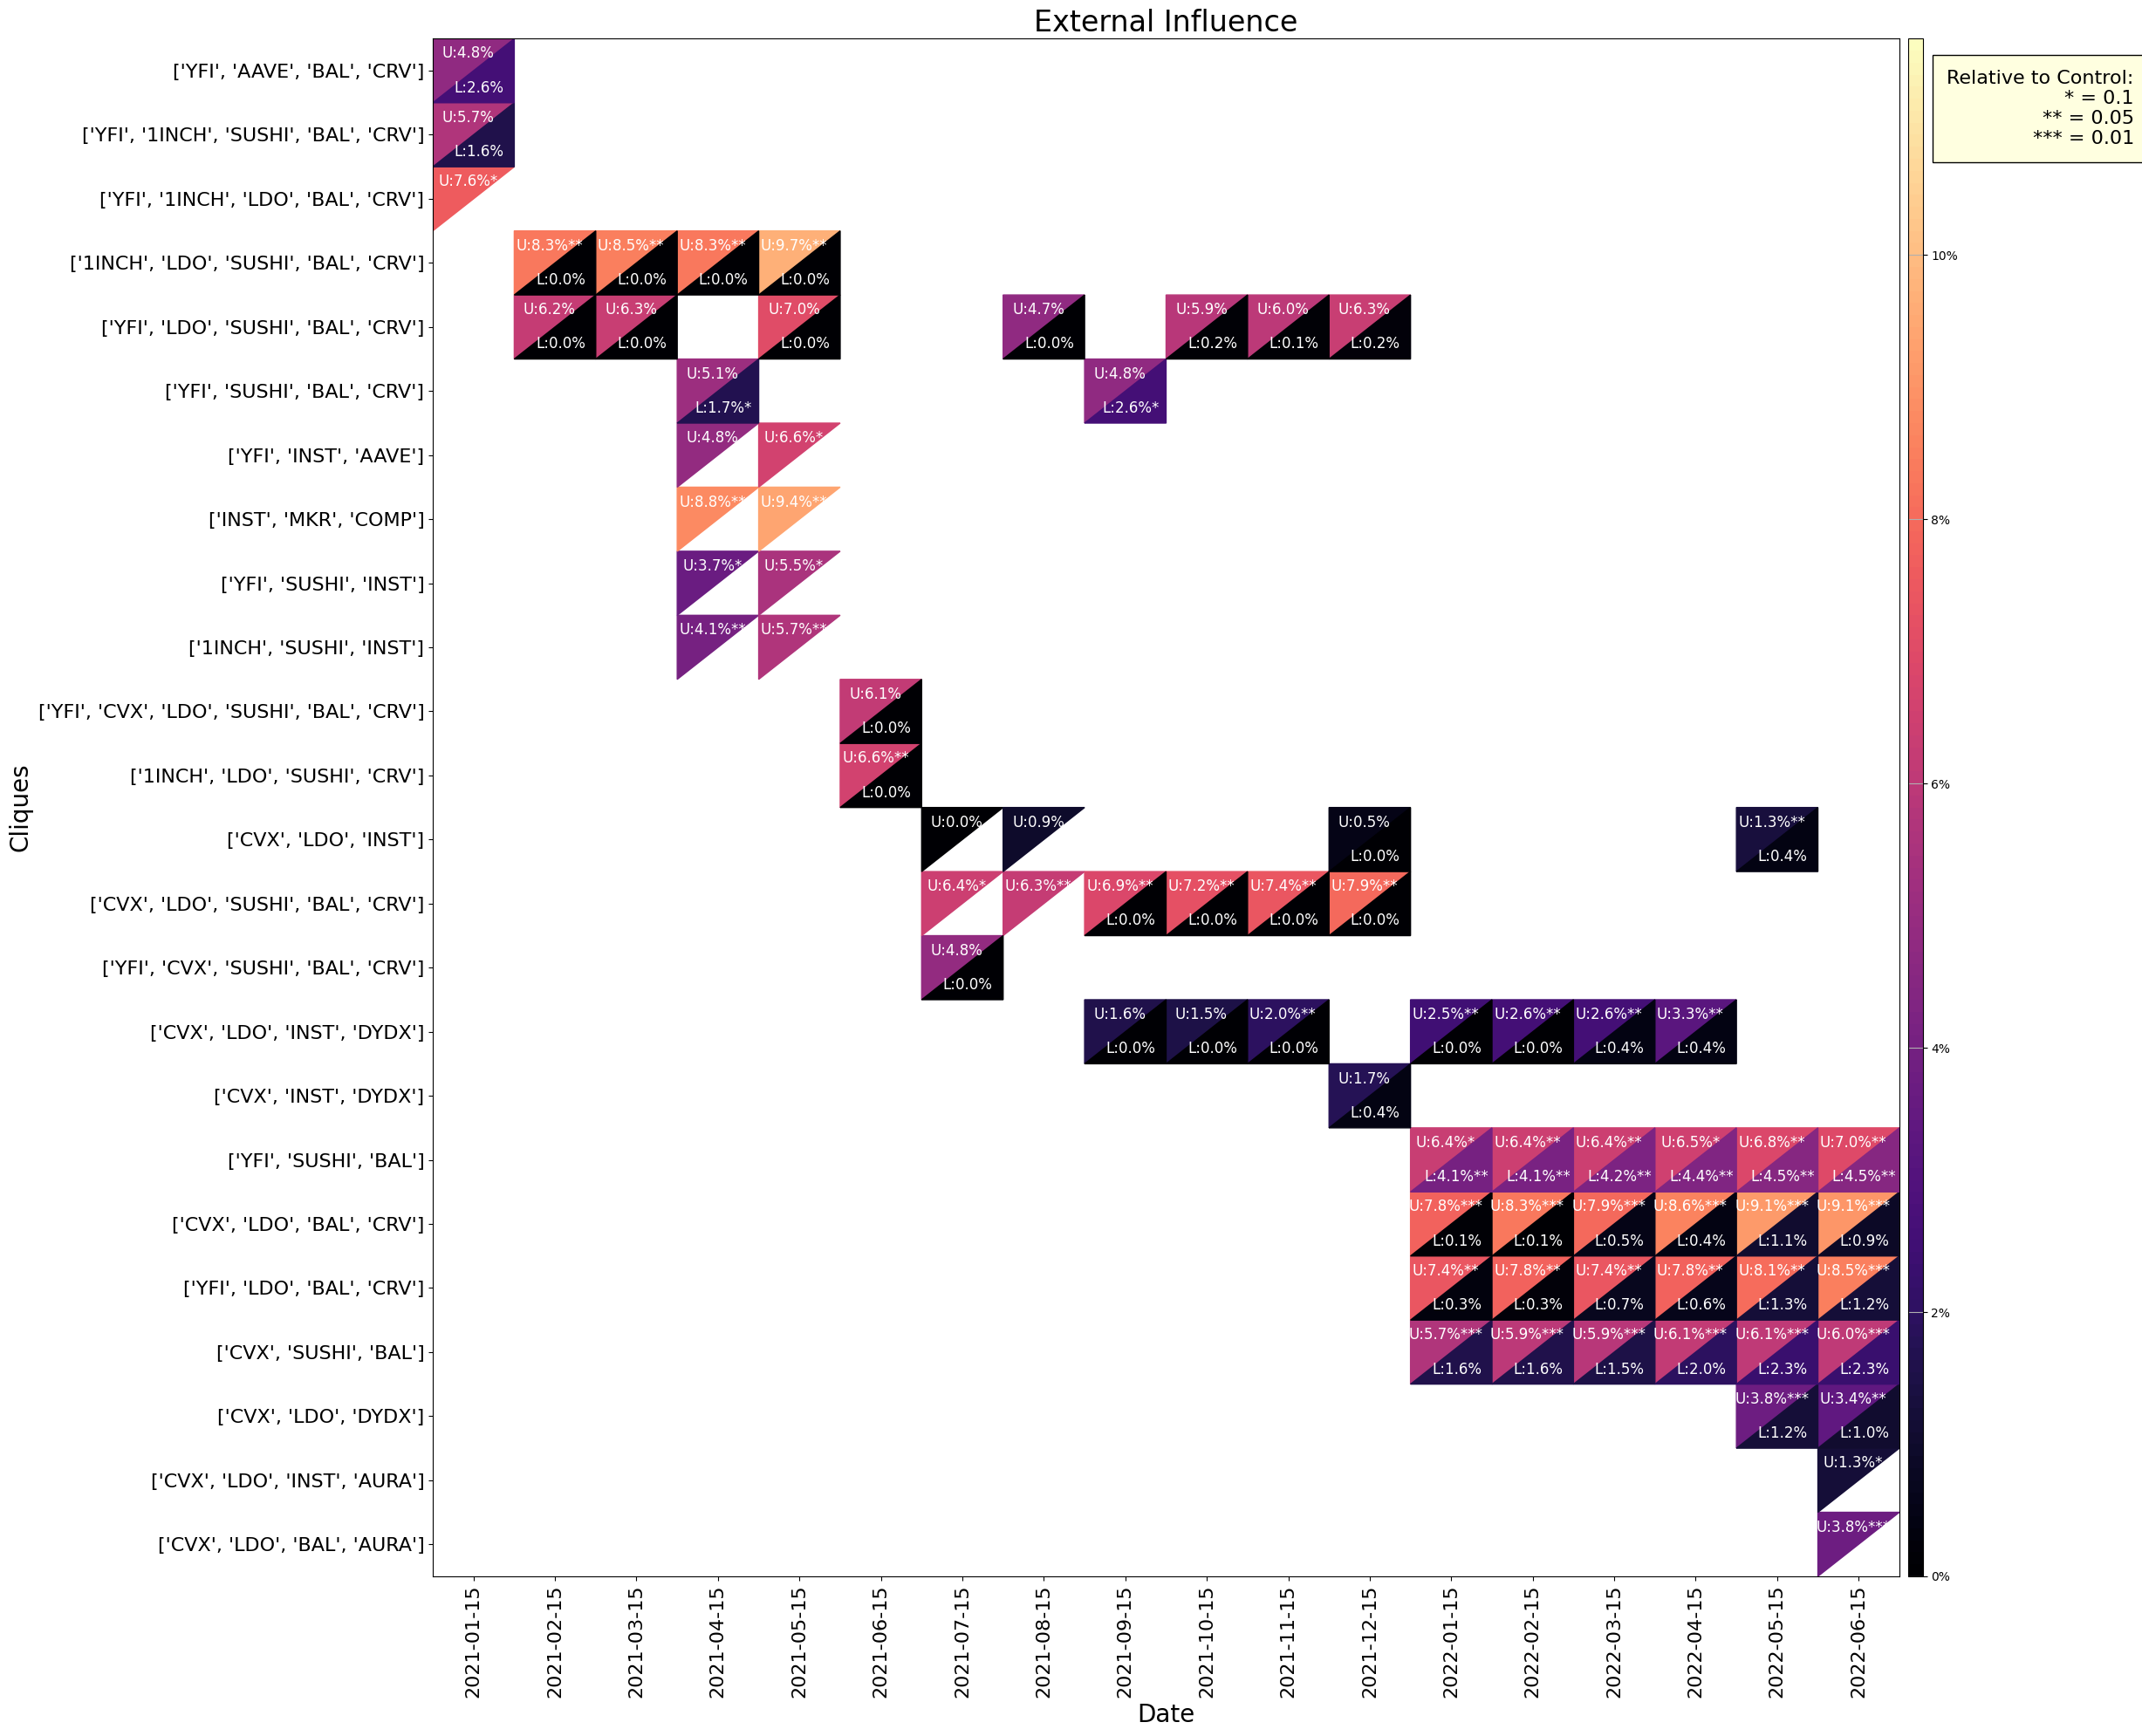

In [16]:
# Assuming metric_dataframes is already defined somewhere in your code
plot_heatmap_chart(metric_dataframes, metric_name='external_influence', pct=True, log=False, save=False, show=True)

### Fig: gini_external_influence

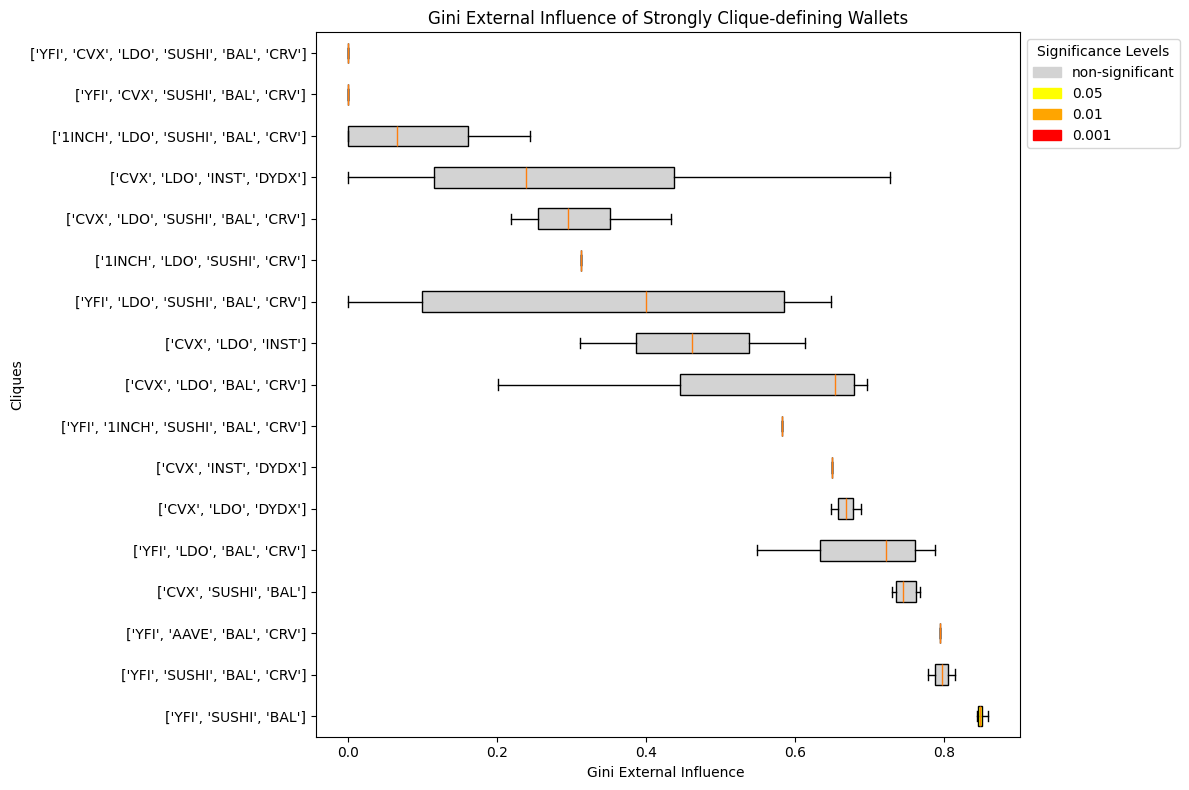

In [17]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='strong_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

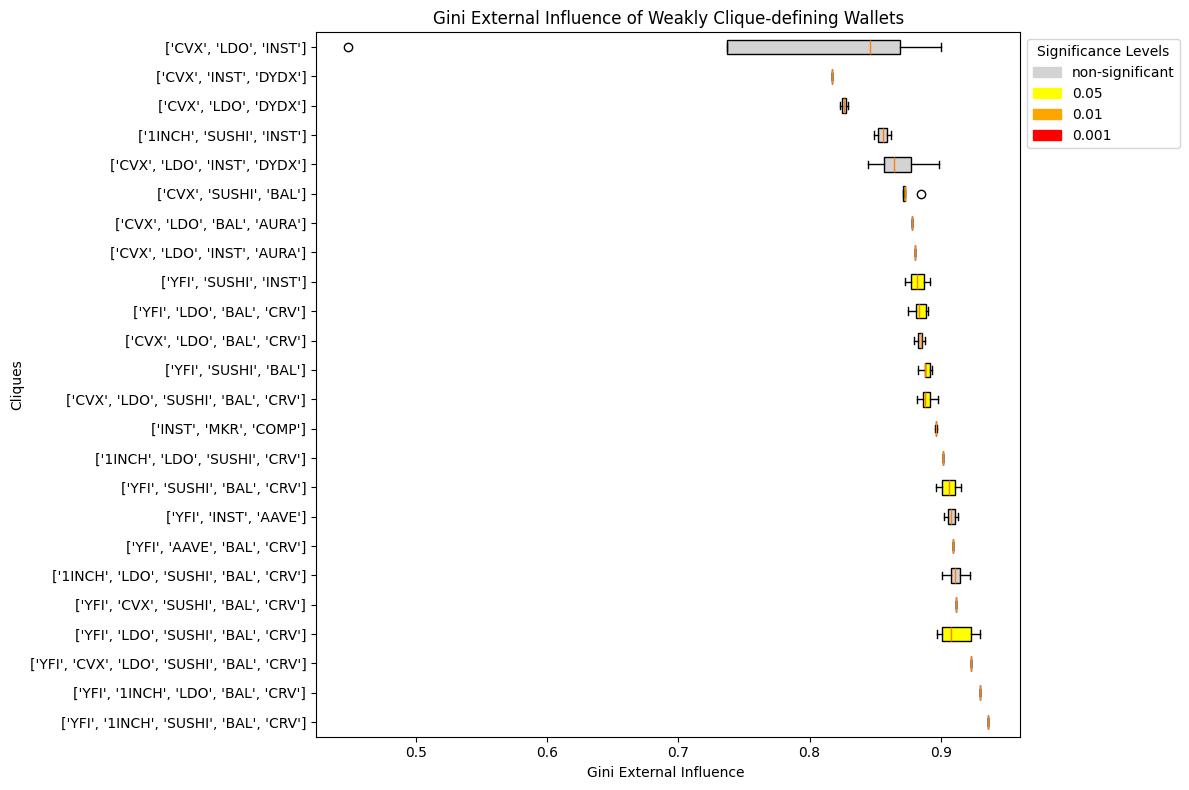

In [18]:
plot_boxplot_with_significance(metric_dataframes, 'gini_external_influence', unit='', method='weak_estimate', group='sample', output_path="output/cliques/", save=False, show=True)

### Fig: wealth_clique

In [19]:
metric_dataframes.keys()

dict_keys(['weak_estimate', 'strong_estimate'])

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


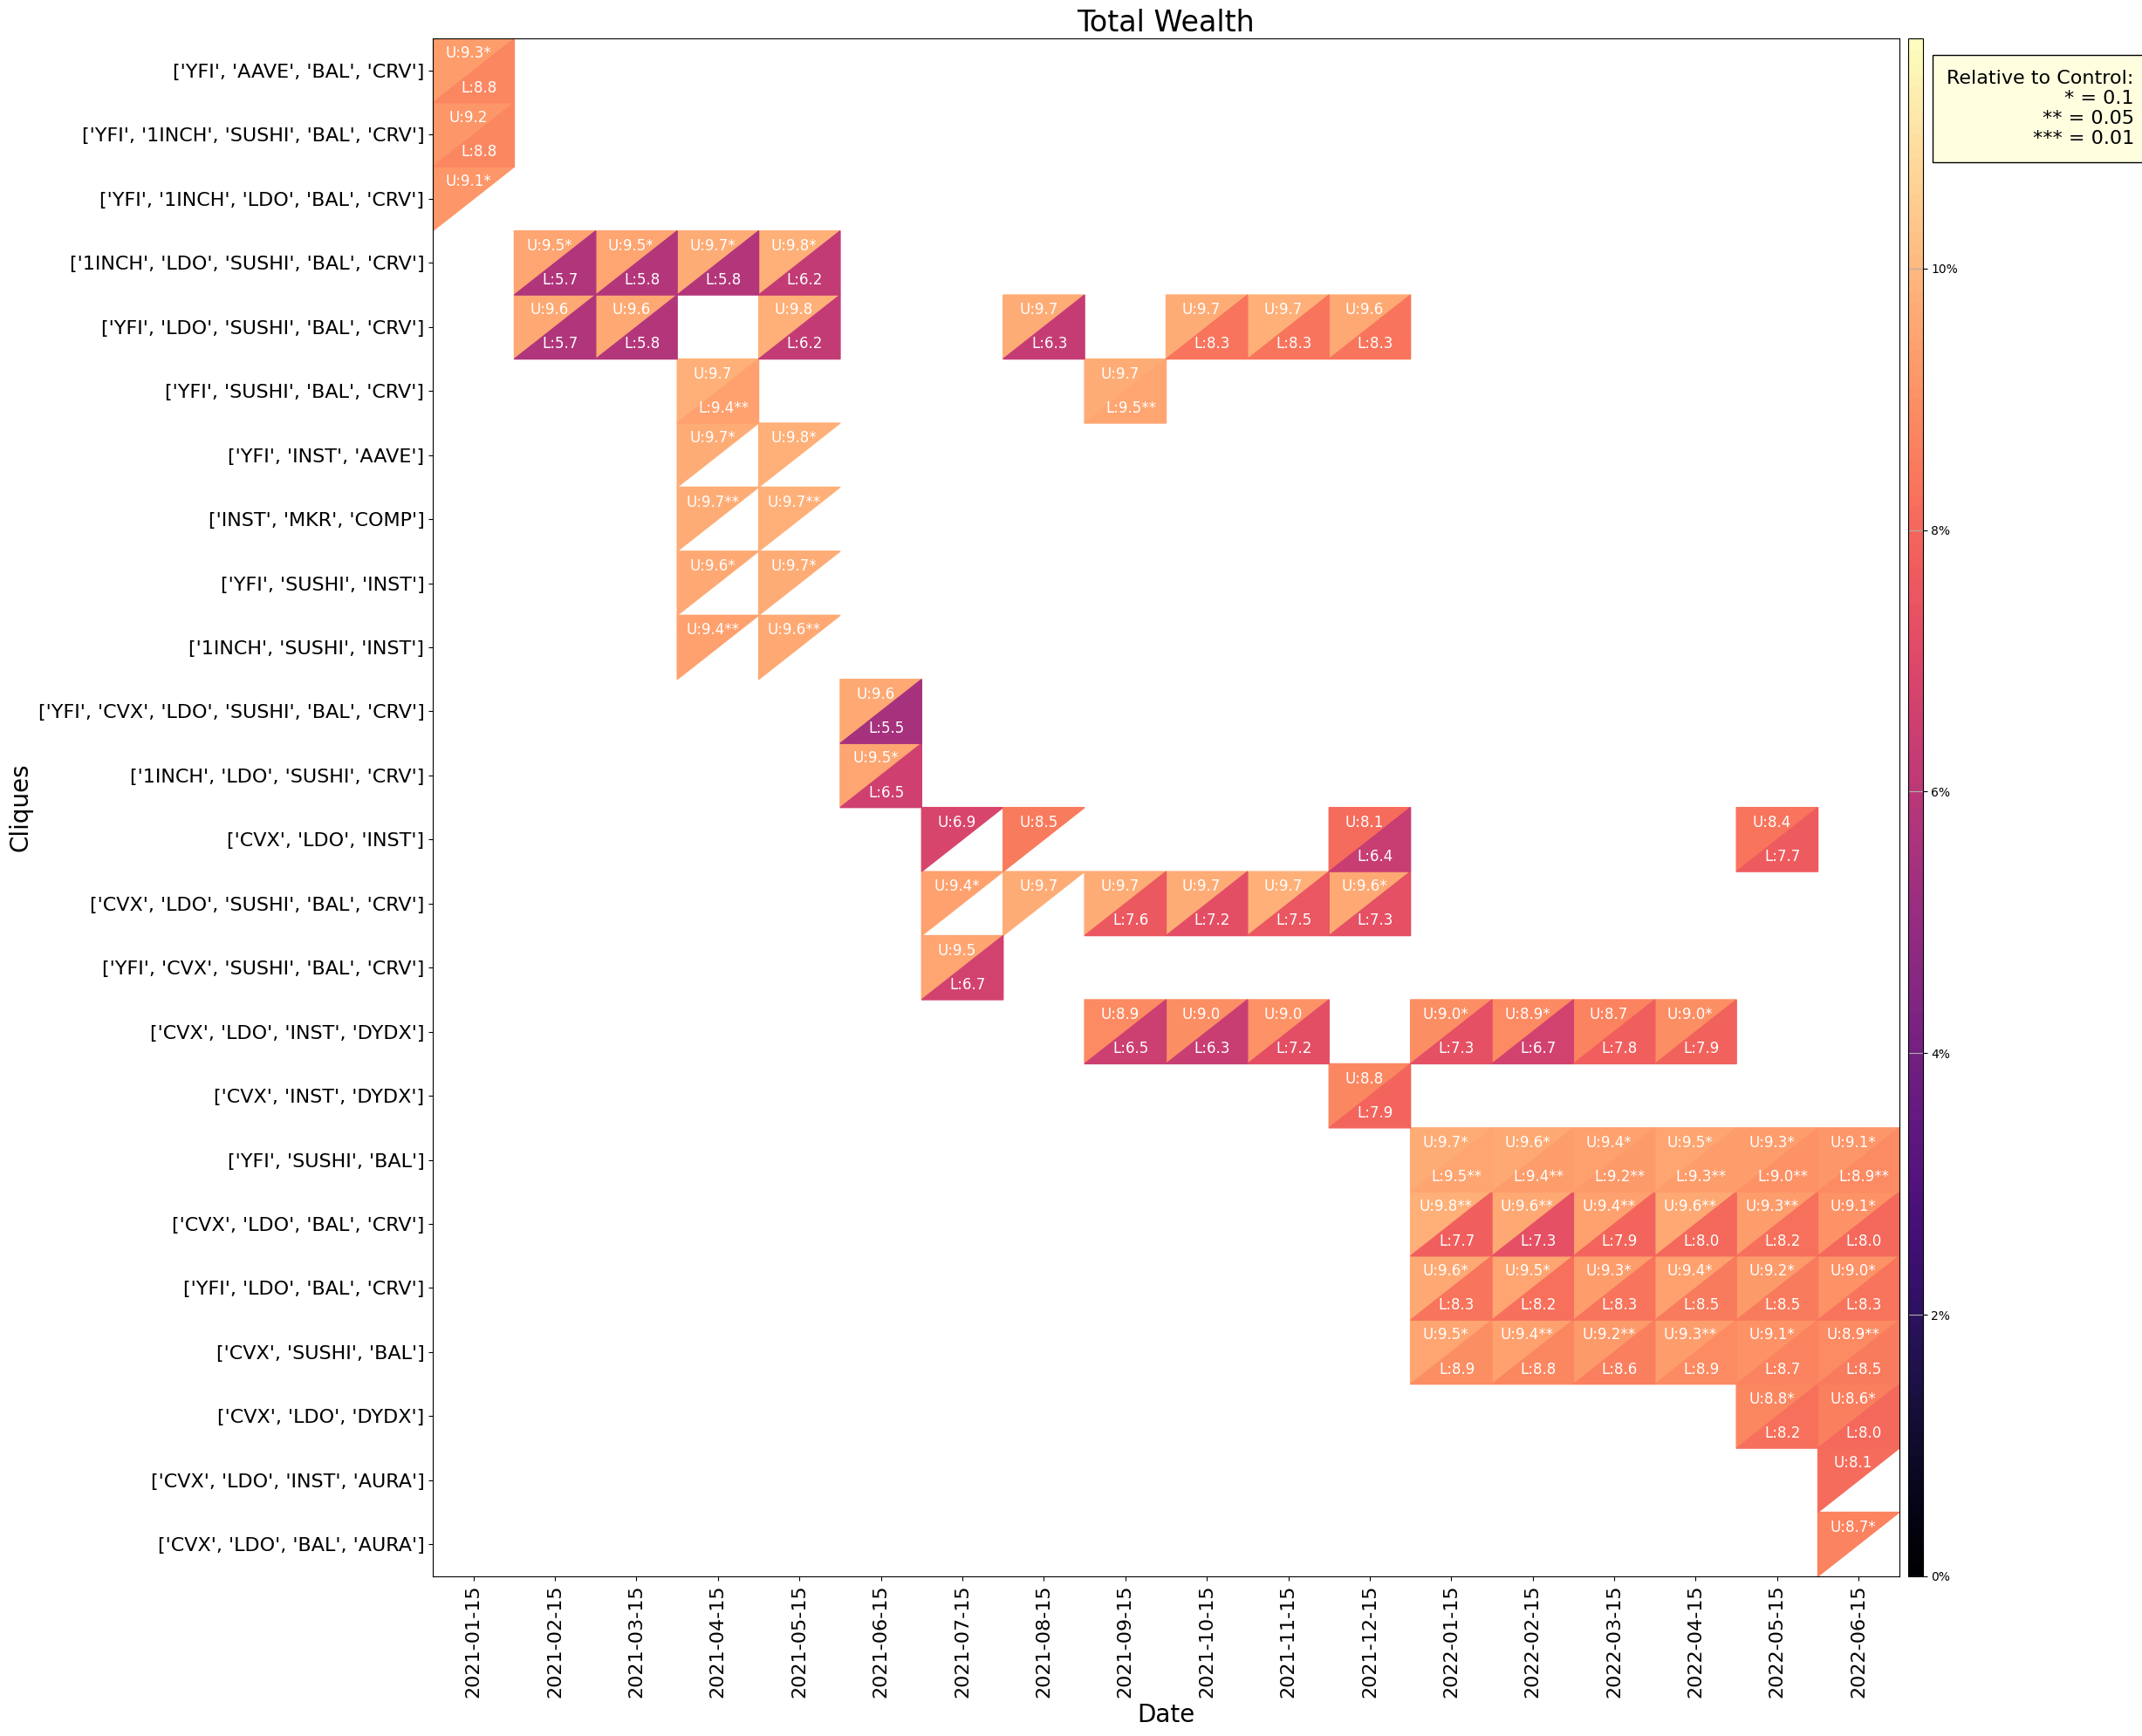

In [20]:
plot_heatmap_chart(metric_dataframes, metric_name='total_wealth', pct=False, log=True, save=False, show=True) 

### Fig: gini_wealth_clique

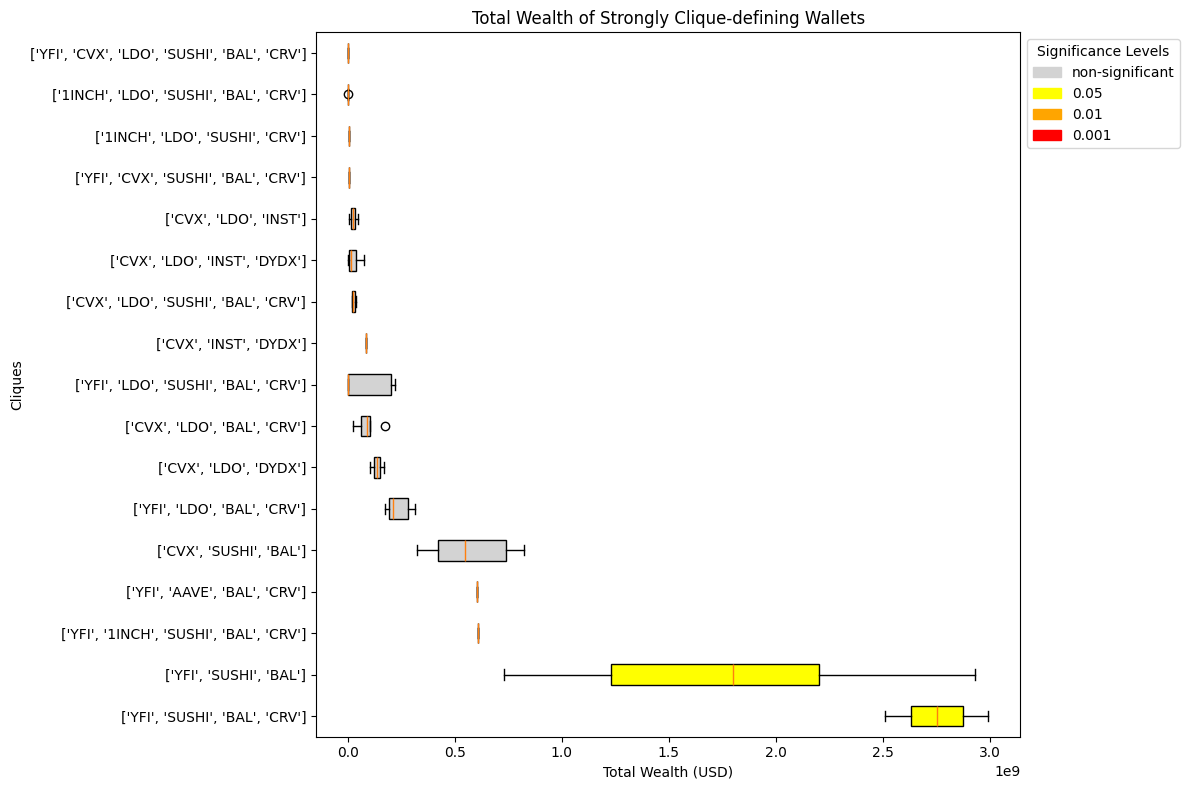

In [21]:
plot_boxplot_with_significance(metric_dataframes, 'total_wealth', unit='(USD)', method='strong_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

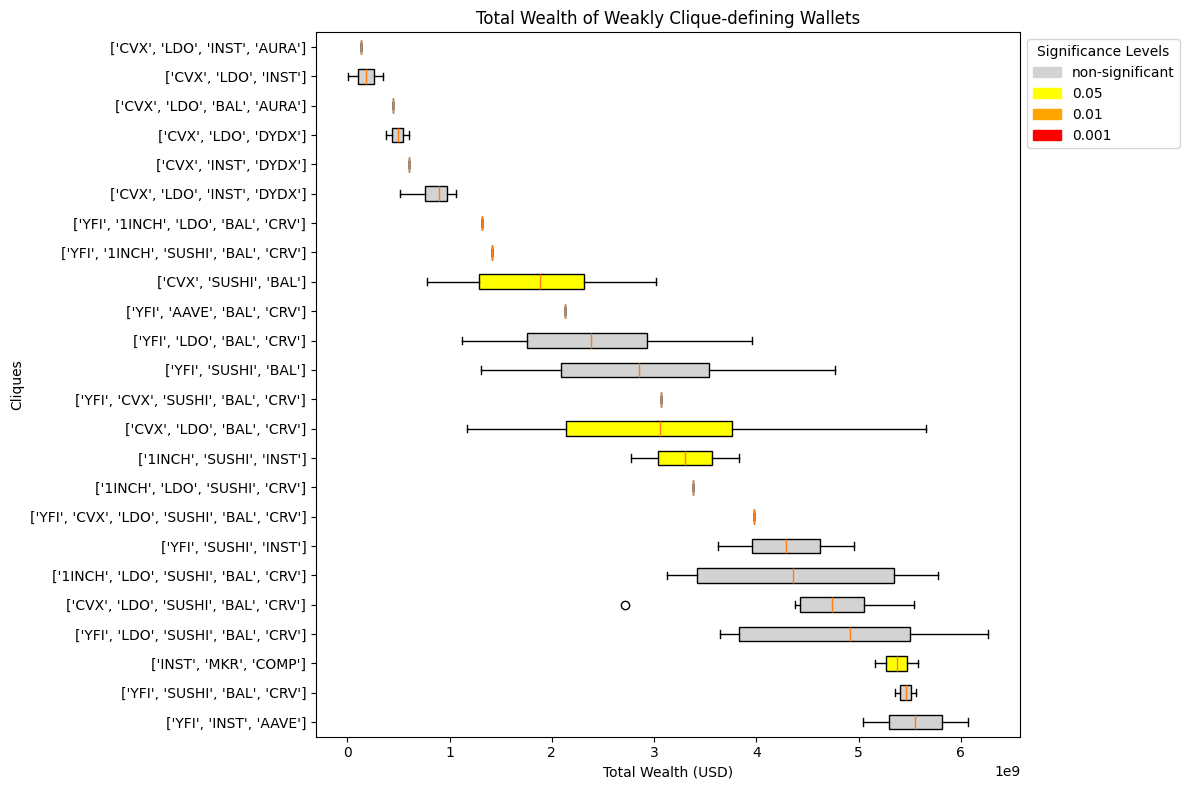

In [22]:
plot_boxplot_with_significance(metric_dataframes, 'total_wealth', unit='(USD)', method='weak_estimate', group='sample', output_path="../output/cliques/", save=True, show=True)

### Fig: median_wealth_level_clique || Note: This is the median position size in a clique

/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


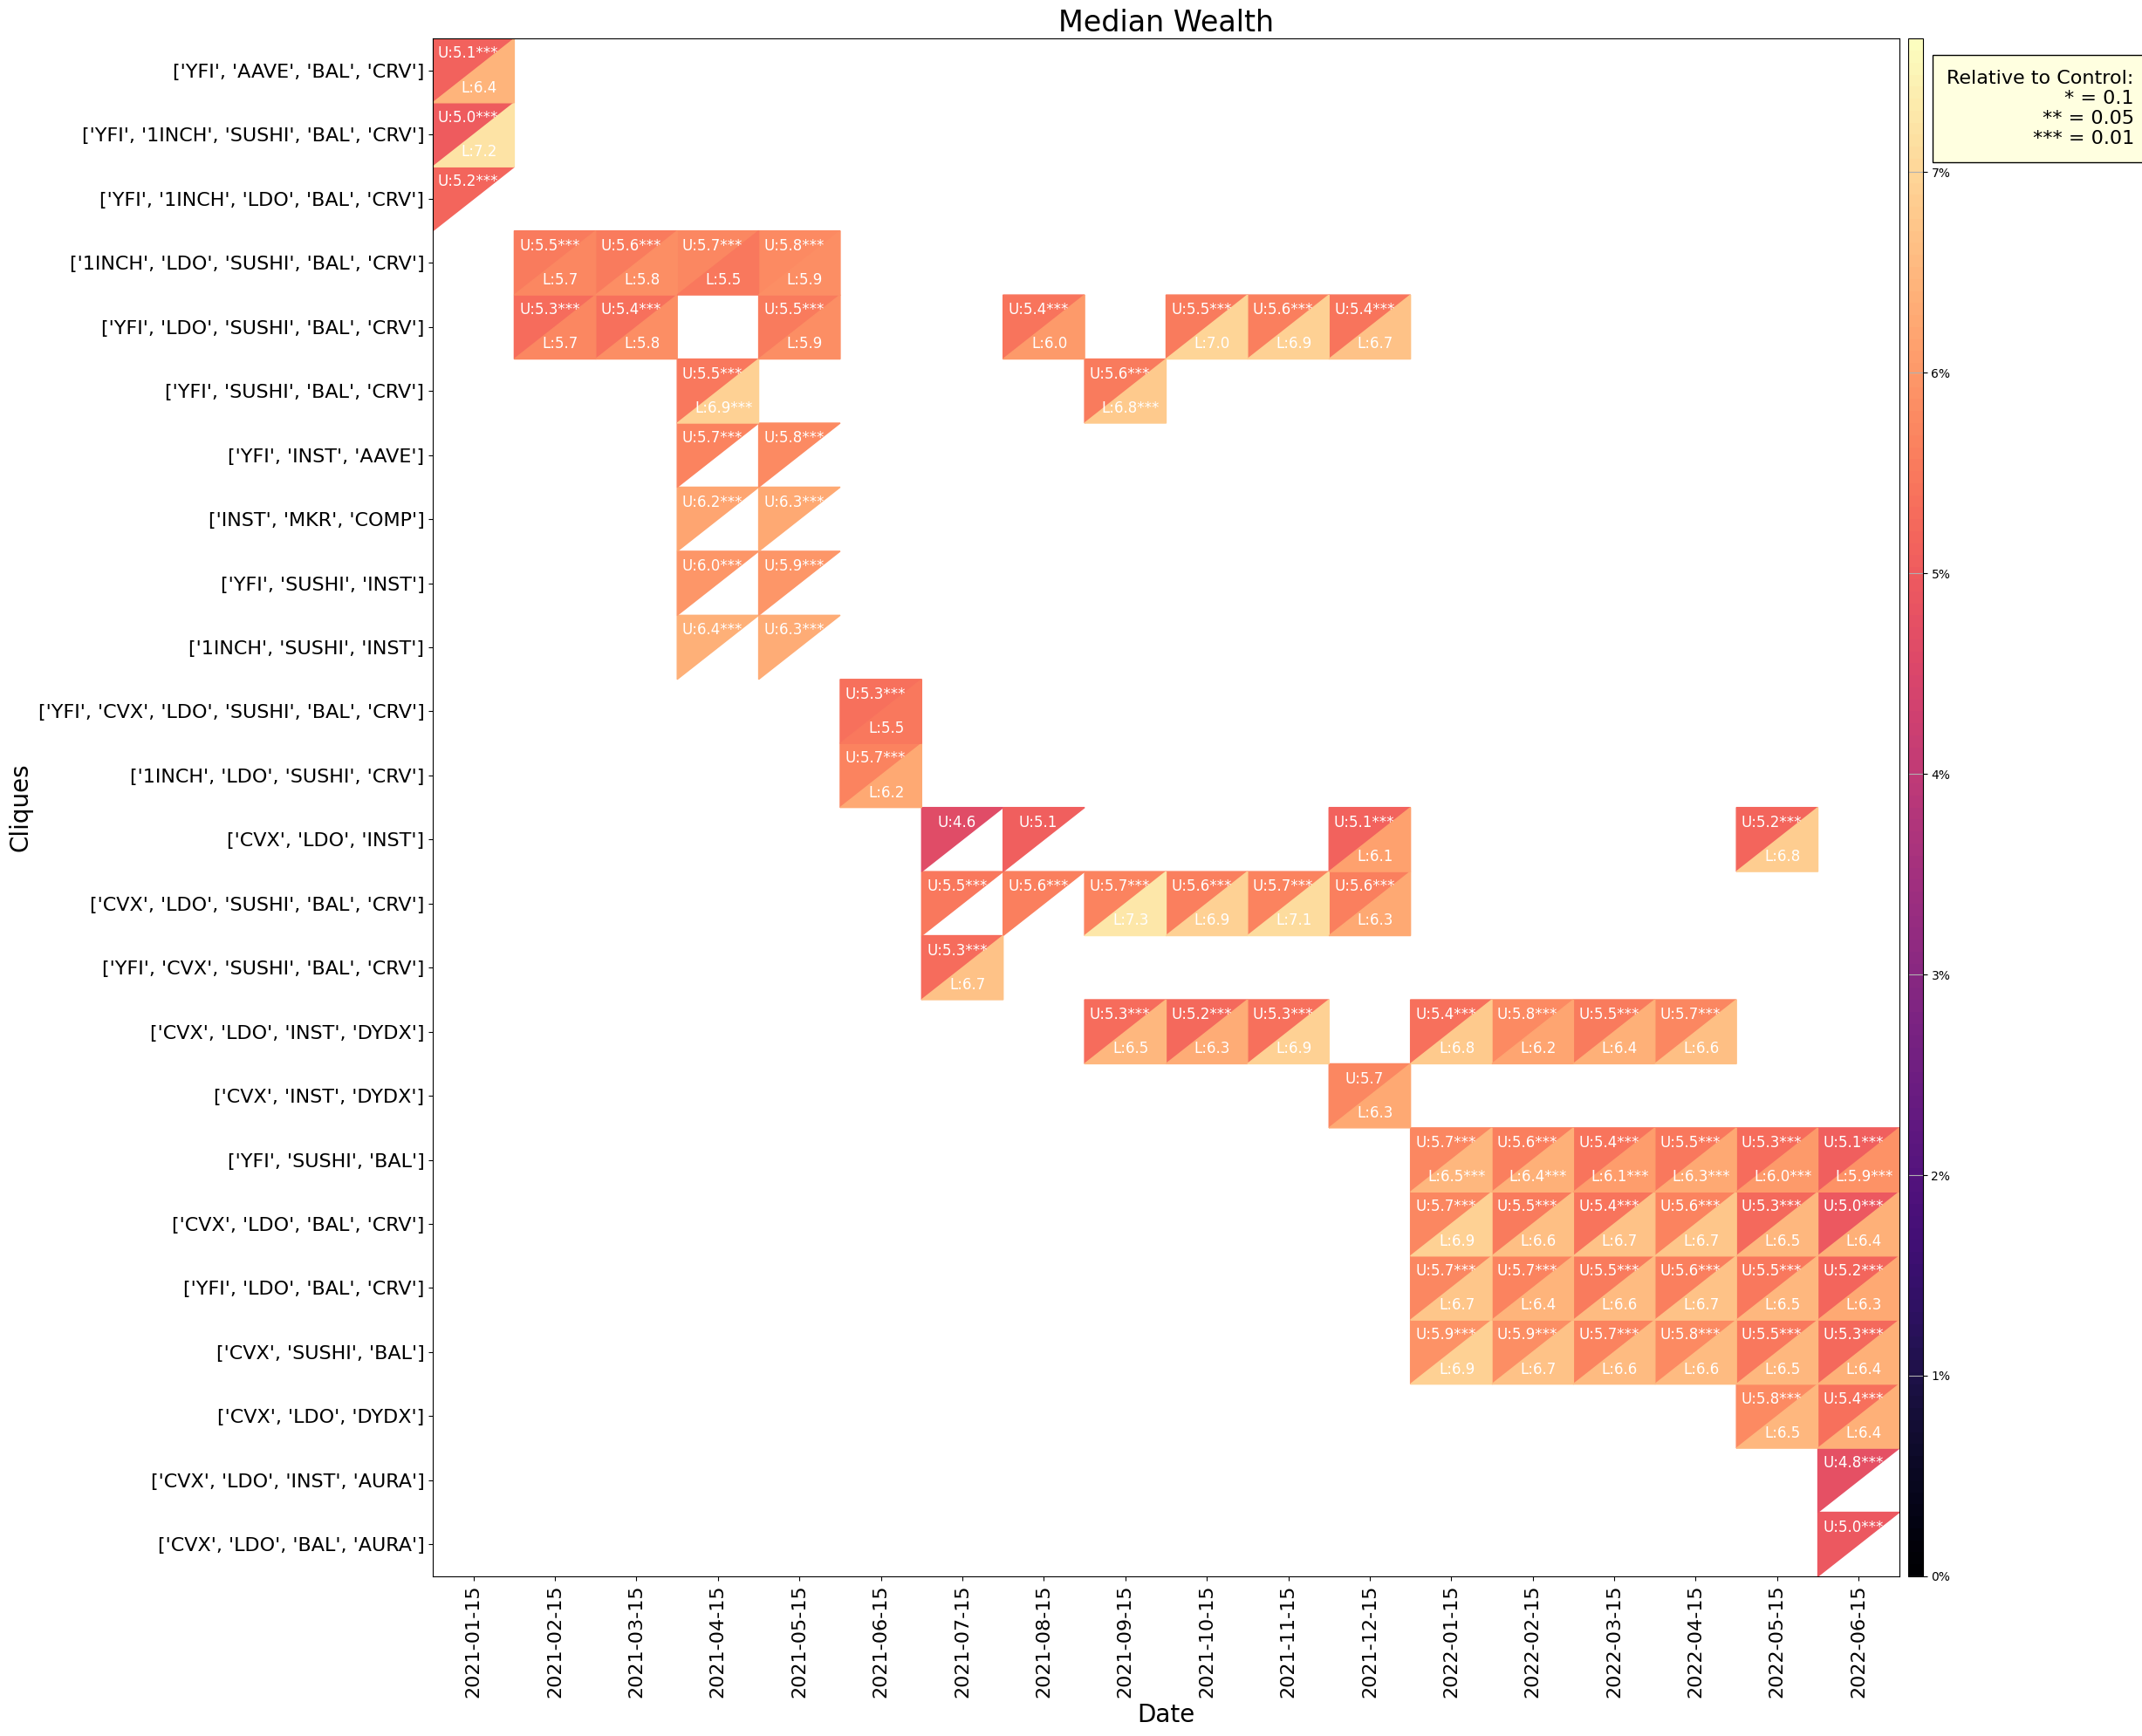

In [23]:
plot_heatmap_chart(metric_dataframes, metric_name='median_wealth', pct=False, log=True, save=False, show=True)

### Fig: median_no_assets_clique


/home/xm3van/research-project-erc20-governance/notebooks/../src/visualisations/clique_analysis_visualisations.py:405: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f'{round(val)}%' for val in tick_vals])


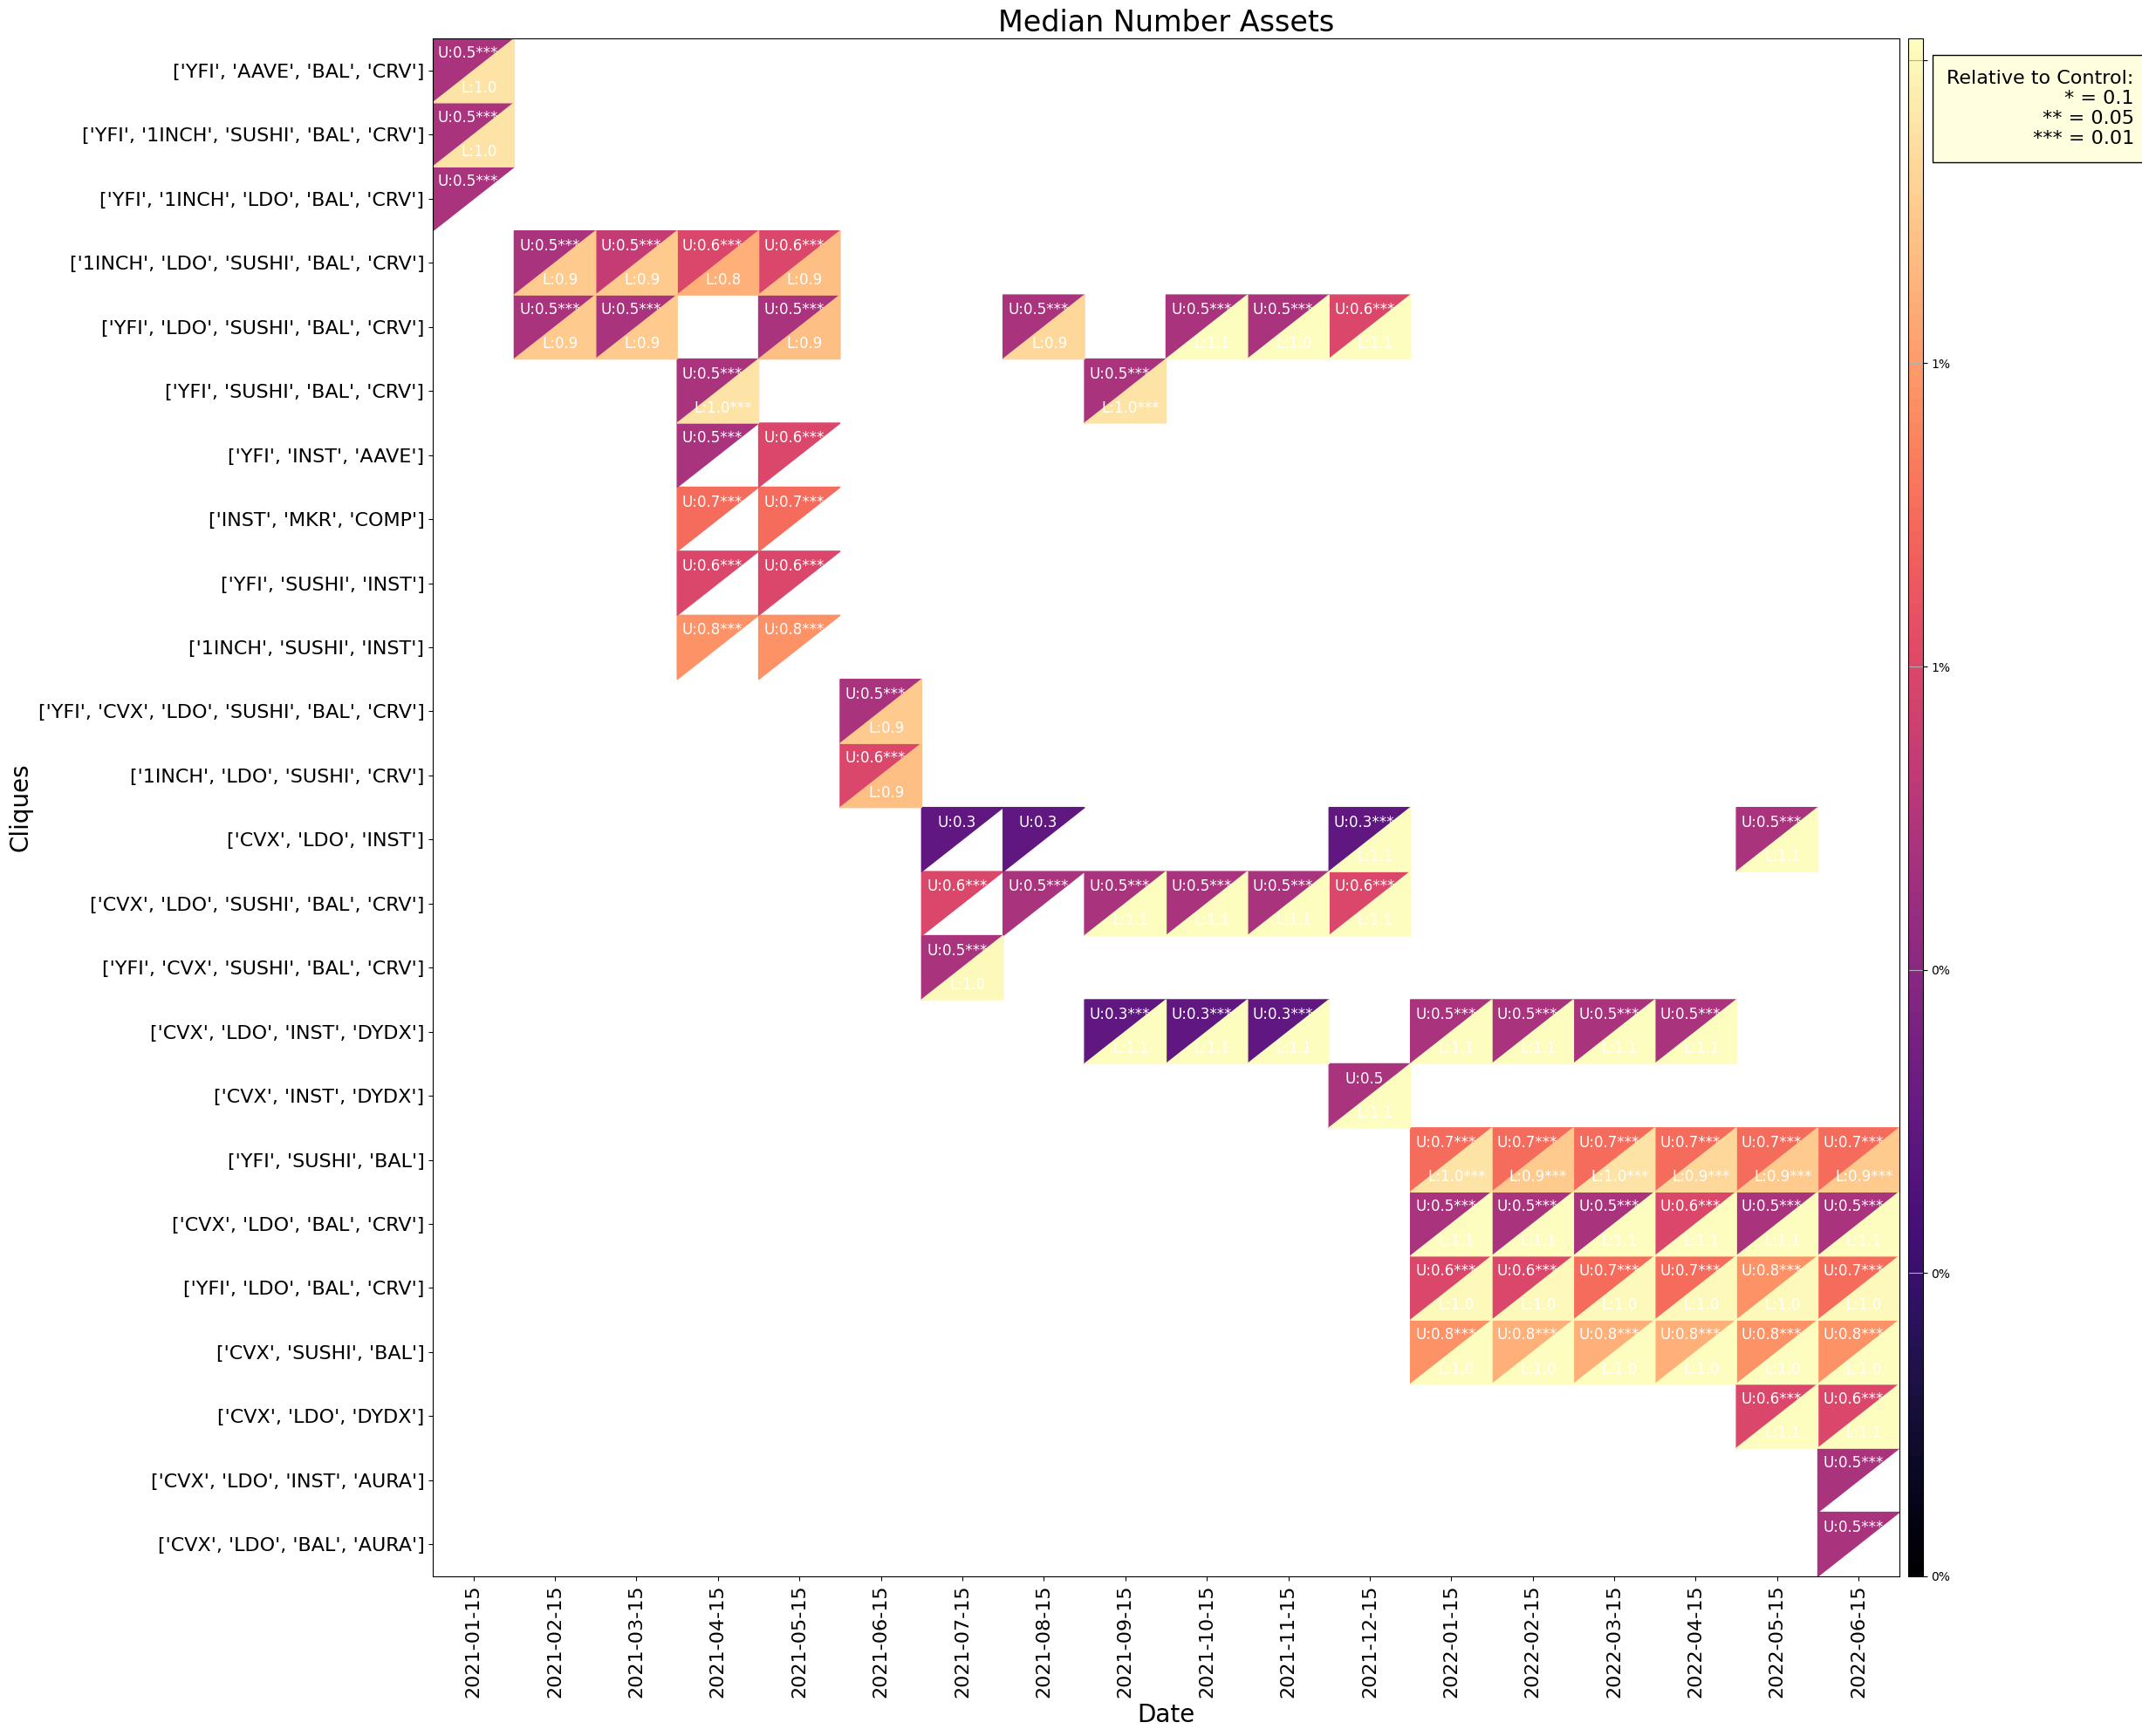

In [24]:
plot_heatmap_chart(metric_dataframes, metric_name='median_number_assets', pct=False, save=False, show=True)

### Fig: Distribution of Labels

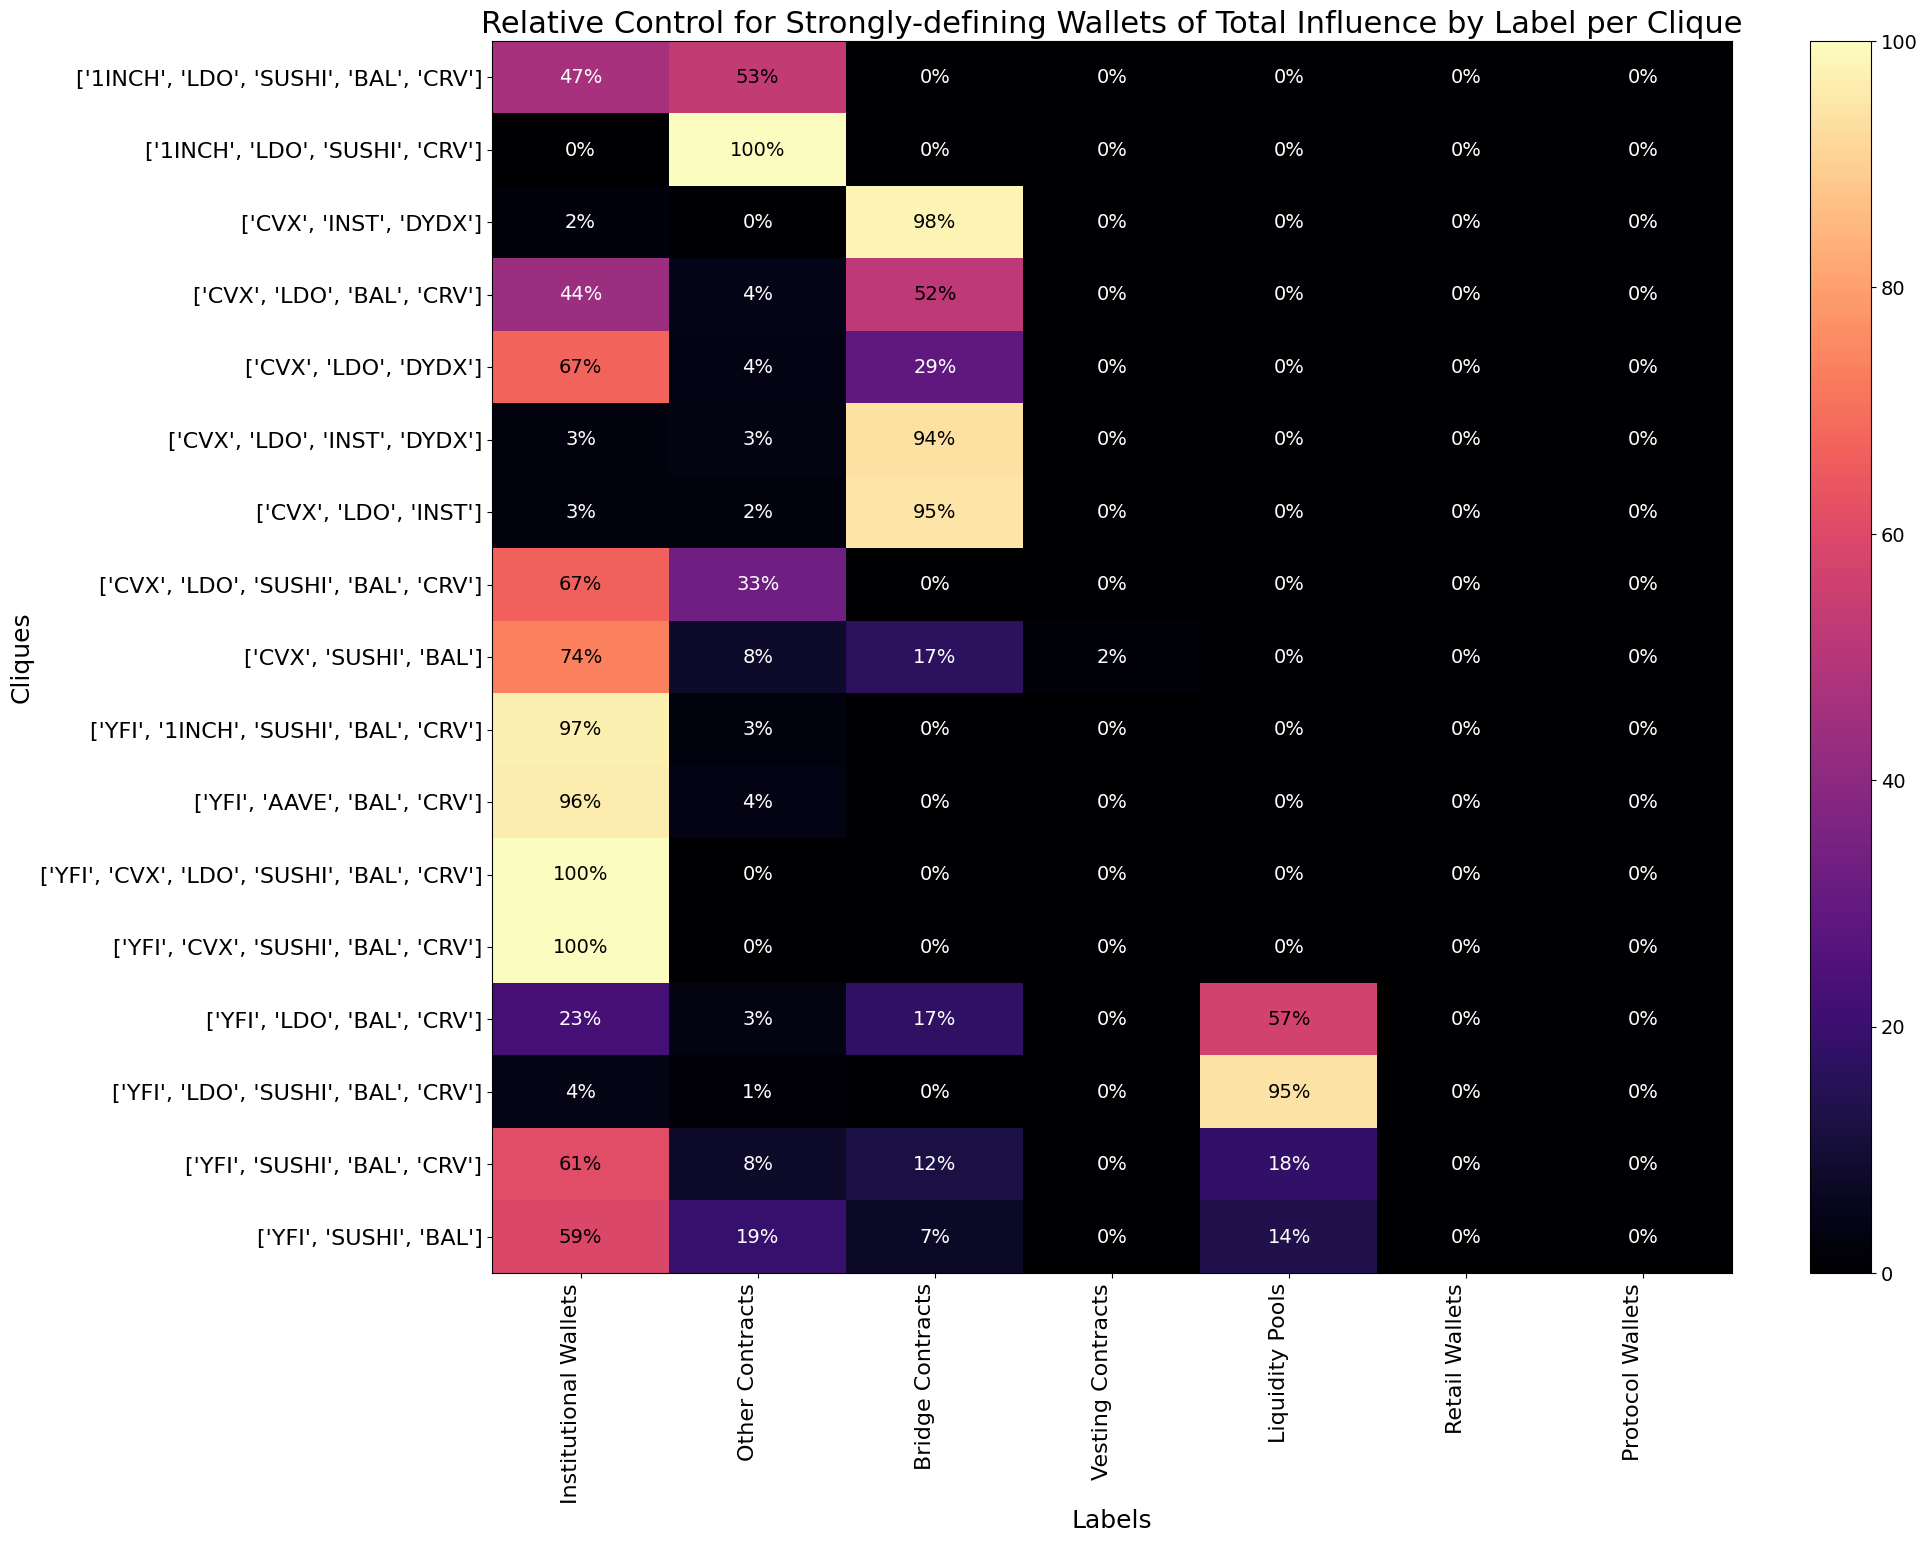

In [25]:
plot_heatmap_labels(metric_dataframes, method='strong_estimate', group='sample', colormap='magma', output_path='../output/cliques')

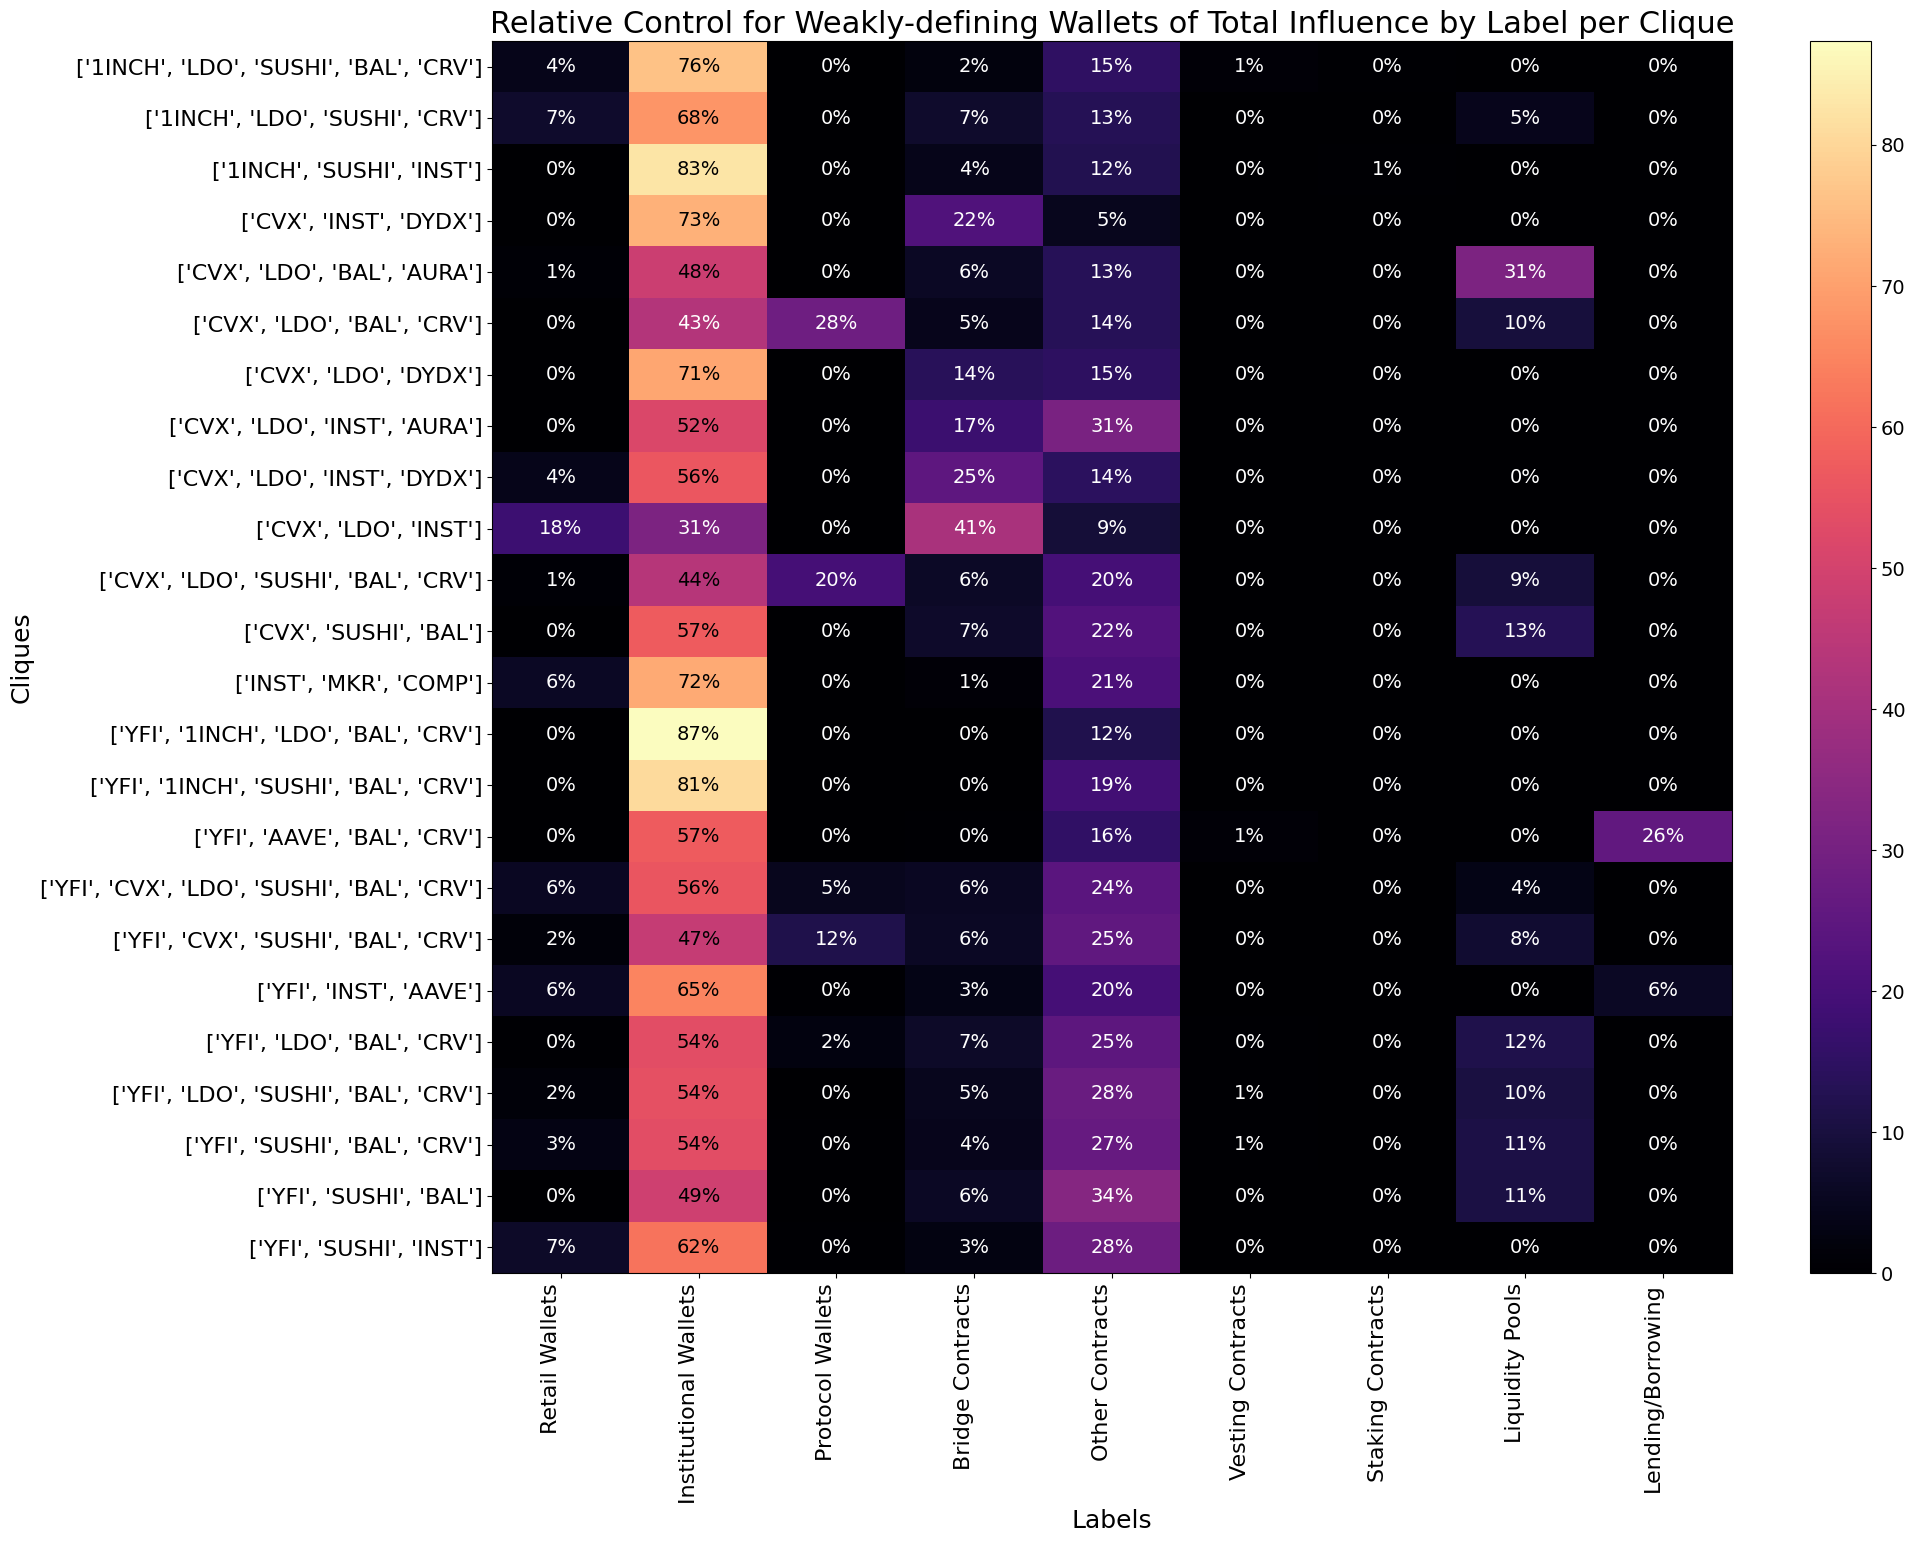

In [26]:
plot_heatmap_labels(metric_dataframes, method='weak_estimate', group='sample', colormap='magma', output_path='../output/cliques')

### Fig: total_influence_directional

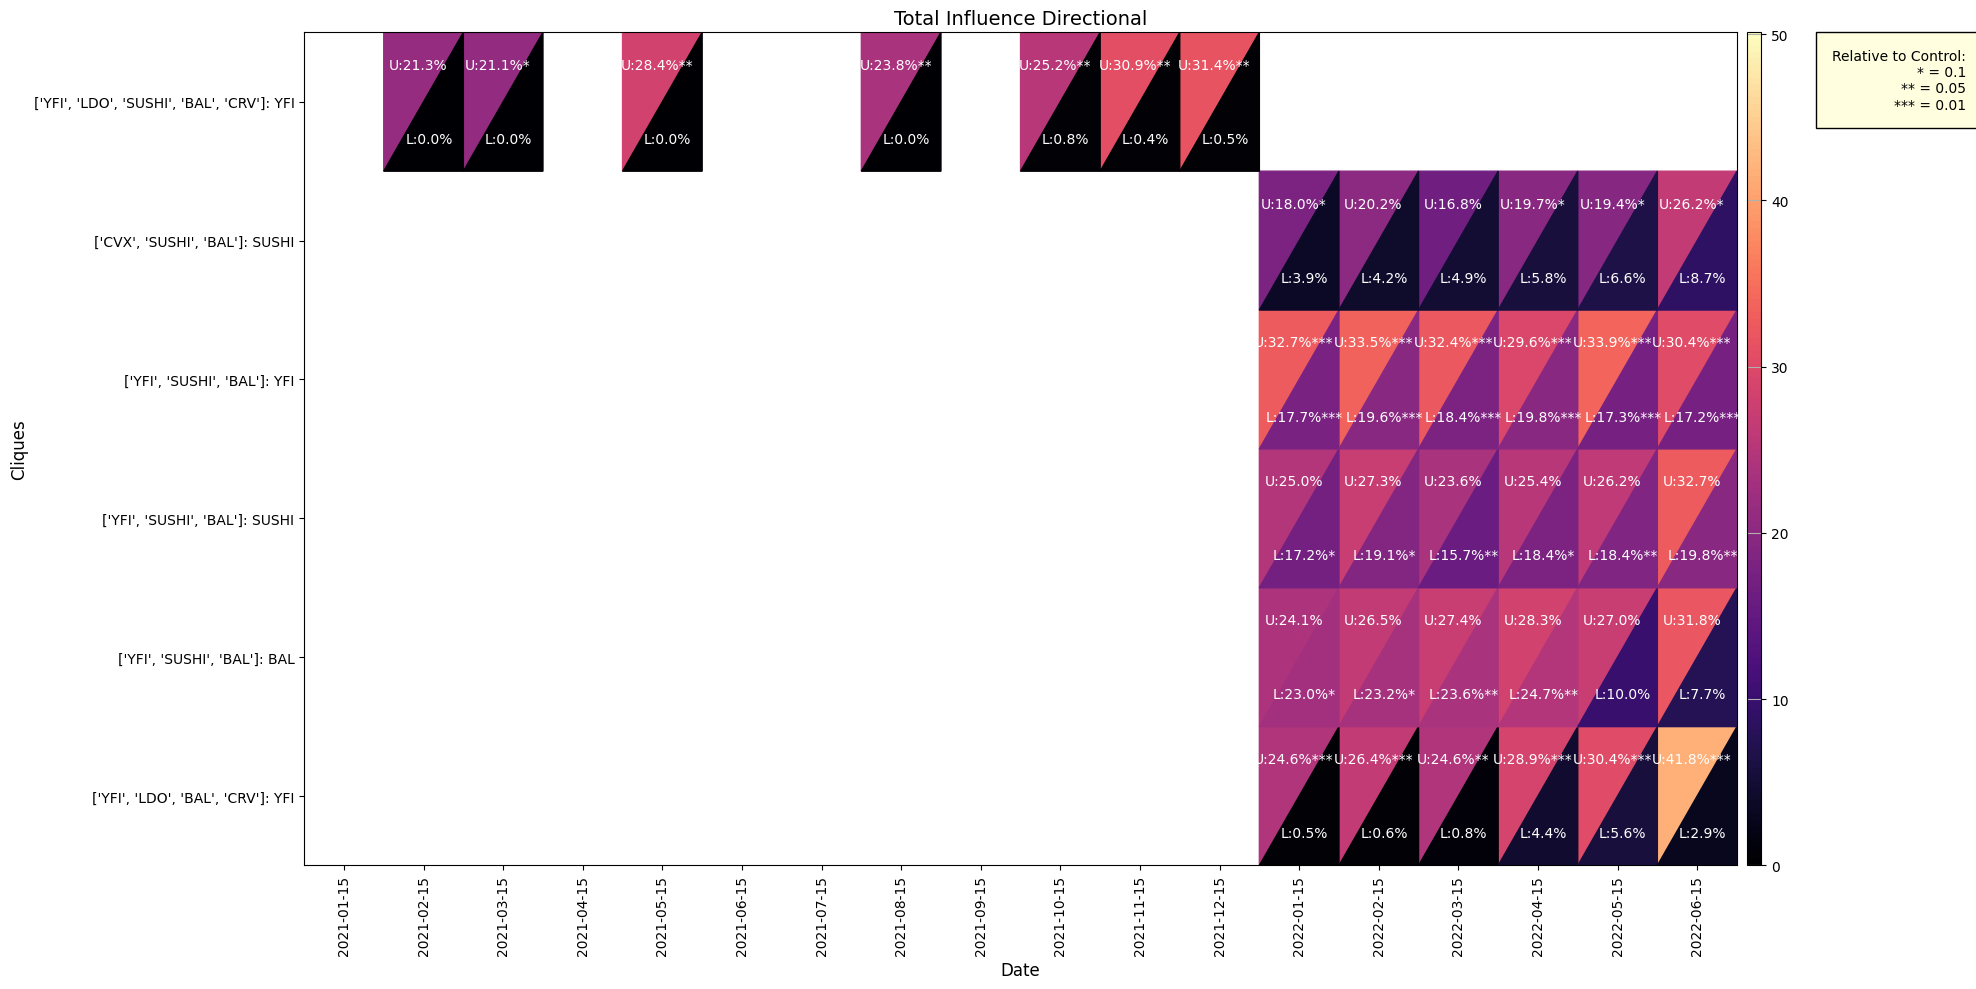

In [27]:
plot_heatmap_chart_directional(metric_dataframes, metric_name='total_influence_directional', pct=True, log=False, output_path="../output/links/", save=False, show=True)